## Single Model Analysis

This example demonstrates a full extensive use of the library to carry out analysis of a single model prediction run. 
It contains tutorials right from reading the data in, in the correct format, diagonistic metric calculations, all the way down to visualizations.

It is intended to be a step through guide that you can follow, cell by cell to achieve your desired model diagonistics output.

As usual, ensure you have done through all the steps as described in the [Quick Start](https://nhs-postprocessing.readthedocs.io/en/stable/QuickStart.html) section of the [documentation](https://nhs-postprocessing.readthedocs.io/en/stable/index.html) page.

Similarly, if you would like to open an editable runnable version of the tutorial click [here](https://mybinder.org/v2/gh/fuadyassin/NHS_PostProcessing/main?%2FHEAD=&urlpath=%2Fdoc%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2FSingle-Model-Analysis.ipynb) to be directed to a binder platform

In [1]:
# Import necessary modules and the postprocessing library

import pandas as pd
import numpy as np
import glob
from natsort import natsorted


from postprocessinglib.evaluation import data, metrics, visuals
from postprocessinglib.utilities import _helper_functions as hlp

In [2]:
# Define the input paths and organize them

folder = r'C:\Users\udenzeU\OneDrive - EC-EC\Fuad_Mesh_Dataset\C0_SRB_Runs' ## new line
start_dates = pd.to_datetime('2006-01-01')
end_dates = pd.to_datetime('2016-12-31')

# Extract the single CSV file
csv_3 = glob.glob(f"{folder}/tr3orgs_out2_20250722_131357/MESH_output_streamflow.csv")

# Path to station names that we will use later.
station_input = "Stations36_updated.xlsx"


Using just the csv file from the third "model run" ...

we use the `generate_dataframes()` function to extract the data in a format to be used by the rest of the library

In [3]:
# Load the Streamflow data using the `generate_dataframes` function 

DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_3, start_date = start_dates)

The start date for the Data is 2006-01-01


In [4]:
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value.head}")

DF:
<bound method NDFrame.head of             QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AC003  QOSIM_05AC003  \
2006-01-01           16.20       8.251542           1.250       0.934610   
2006-01-02           16.20       8.268182           1.260       0.927514   
2006-01-03           16.10       8.268285           1.280       0.922706   
2006-01-04           16.10       8.265919           1.300       0.919975   
2006-01-05           16.10       8.263036           1.350       0.918143   
...                    ...            ...             ...            ...   
2016-12-27            8.62       0.655629           0.966       0.528861   
2016-12-28            8.64       0.652242           1.010       0.534474   
2016-12-29            8.63       0.648954           1.030       0.539484   
2016-12-30            8.64       0.645164           1.030       0.543866   
2016-12-31            8.61       0.642502           1.010       0.547652   

            QOMEAS_05AD007  QOSIM_05AD007  QOMEAS_05A

Observe that the stations in the dataframe `DF_MERGED` are labelled as Station1, Station2, etc. This is great for versatility but for this example we will be renaming them to the actual station names. This is shown below

In [5]:
# We have an excel file containing the station names we need
Stations = pd.read_excel(io=station_input)
Stations = Stations.set_index('Station Number')

# Get the unique level 1 values (e.g., ['QOMEAS', 'QOSIM3'])
level_1_values = DATAFRAMES["DF_MERGED"].columns.get_level_values(1).unique()

# Repeat the index from other_df to match the column count
new_level_0 = np.repeat(Stations.index, len(level_1_values))

# Rebuild the MultiIndex
DATAFRAMES["DF_MERGED"].columns = pd.MultiIndex.from_arrays([new_level_0, DATAFRAMES["DF_MERGED"].columns.get_level_values(1)])

In [6]:
merged_df = DATAFRAMES["DF_MERGED"] #simple rename for easy repeated use
merged_df

Station Number 05AA024           05AC003           05AD007            05AG006  \
                QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS     QOSIM1  QOMEAS   
2006-01-01       16.20  8.251542   1.250  0.934610    41.3  18.313040    52.3   
2006-01-02       16.20  8.268182   1.260  0.927514    41.9  17.737730    53.0   
2006-01-03       16.10  8.268285   1.280  0.922706    42.1  16.954540    53.3   
2006-01-04       16.10  8.265919   1.300  0.919975    42.4  16.726120    54.5   
2006-01-05       16.10  8.263036   1.350  0.918143    43.1  16.695080    54.1   
...                ...       ...     ...       ...     ...        ...     ...   
2016-12-27        8.62  0.655629   0.966  0.528861    20.7   7.048034    21.7   
2016-12-28        8.64  0.652242   1.010  0.534474    22.0   7.042959    22.6   
2016-12-29        8.63  0.648954   1.030  0.539484    24.5   7.037765    24.3   
2016-12-30        8.64  0.645164   1.030  0.543866    25.5   7.032383    25.7   
2016-12-31        8.61  0.642502   1.010  0.547652    25.1   7.026749    25.8   

Station Number            05AJ001            ... 05HD039           05HG001  \
                   QOSIM1  QOMEAS    QOSIM1  ...  QOMEAS    QOSIM1  QOMEAS   
2006-01-01      19.312690   144.0  77.77477  ...   0.363  0.021097   245.0   
2006-01-02      19.291240   147.0  77.72770  ...   0.408  0.020869   250.0   
2006-01-03      19.268370   145.0  77.68994  ...   0.504  0.020657   247.0   
2006-01-04      19.212070   146.0  77.65980  ...   0.524  0.020458   251.0   
2006-01-05      19.003410   147.0  77.61514  ...   0.487  0.020272   282.0   
...                   ...     ...       ...  ...     ...       ...     ...   
2016-12-27       7.151505    82.6  34.76269  ...   1.650  0.099204   294.0   
2016-12-28       7.145447    85.5  34.57685  ...   1.670  0.092179   291.0   
2016-12-29       7.139501    86.4  34.38791  ...   1.700  0.085633   290.0   
2016-12-30       7.133636    85.6  34.19665  ...   1.700  0.079540   291.0   
2016-12-31       7.127830    83.5  34.00348  ...   1.710  0.073904   296.0   

Station Number           05KD003           05KE002           05KJ001            
                  QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  
2006-01-01      243.9071   317.0  279.7522     NaN  6.080291   580.0  458.8904  
2006-01-02      246.0166   312.0  253.4234     NaN  6.043128   577.0  457.1690  
2006-01-03      263.2702   324.0  287.3772     NaN  6.003728   574.0  445.3347  
2006-01-04      275.0443   372.0  318.6789     NaN  5.961734   570.0  390.2301  
2006-01-05      275.7499   569.0  341.7578     NaN  5.921951   565.0  336.3000  
...                  ...     ...       ...     ...       ...     ...       ...  
2016-12-27      223.4322   301.0  353.2743     NaN  0.802104   646.0  382.5126  
2016-12-28      223.0046   424.0  353.3249     NaN  0.799029   628.0  381.3967  
2016-12-29      222.7246   450.0  353.5526     NaN  0.795955   615.0  380.3037  
2016-12-30      222.7773   413.0  350.5949     NaN  0.792732   603.0  379.8543  
2016-12-31      224.0186   415.0  349.6316     NaN  0.789295   597.0  379.1852  

[4018 rows x 72 columns]

We are ready to continue

### DATA MANIPULATION
This section involves a lot of the pre aggregation and manipulation that goes into preparing the data for the rest of the library. These aggregations can be performed `daily`, `weekly`, `monthly`, `yearly`, `seasonally` and a different type we cal `long term seasonal` which aggregates the values of a given DataFrame by applying the specified aggregation method to each day across all years in the provided time period resulting in data that has been aggregated into a single year (1 to 365/366 days).

We are also able to perform statistical calculations latitudinally accross each individual 'day' of the data frame

In [7]:
data.daily_aggregate(df=merged_df)

Station Number 05AA024           05AC003           05AD007            05AG006  \
                QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS     QOSIM1  QOMEAS   
2006/001         16.20  8.251542   1.250  0.934610    41.3  18.313040    52.3   
2006/002         16.20  8.268182   1.260  0.927514    41.9  17.737730    53.0   
2006/003         16.10  8.268285   1.280  0.922706    42.1  16.954540    53.3   
2006/004         16.10  8.265919   1.300  0.919975    42.4  16.726120    54.5   
2006/005         16.10  8.263036   1.350  0.918143    43.1  16.695080    54.1   
...                ...       ...     ...       ...     ...        ...     ...   
2016/362          8.62  0.655629   0.966  0.528861    20.7   7.048034    21.7   
2016/363          8.64  0.652242   1.010  0.534474    22.0   7.042959    22.6   
2016/364          8.63  0.648954   1.030  0.539484    24.5   7.037765    24.3   
2016/365          8.64  0.645164   1.030  0.543866    25.5   7.032383    25.7   
2016/366          8.61  0.642502   1.010  0.547652    25.1   7.026749    25.8   

Station Number            05AJ001            ... 05HD039           05HG001  \
                   QOSIM1  QOMEAS    QOSIM1  ...  QOMEAS    QOSIM1  QOMEAS   
2006/001        19.312690   144.0  77.77477  ...   0.363  0.021097   245.0   
2006/002        19.291240   147.0  77.72770  ...   0.408  0.020869   250.0   
2006/003        19.268370   145.0  77.68994  ...   0.504  0.020657   247.0   
2006/004        19.212070   146.0  77.65980  ...   0.524  0.020458   251.0   
2006/005        19.003410   147.0  77.61514  ...   0.487  0.020272   282.0   
...                   ...     ...       ...  ...     ...       ...     ...   
2016/362         7.151505    82.6  34.76269  ...   1.650  0.099204   294.0   
2016/363         7.145447    85.5  34.57685  ...   1.670  0.092179   291.0   
2016/364         7.139501    86.4  34.38791  ...   1.700  0.085633   290.0   
2016/365         7.133636    85.6  34.19665  ...   1.700  0.079540   291.0   
2016/366         7.127830    83.5  34.00348  ...   1.710  0.073904   296.0   

Station Number           05KD003           05KE002           05KJ001            
                  QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  
2006/001        243.9071   317.0  279.7522     NaN  6.080291   580.0  458.8904  
2006/002        246.0166   312.0  253.4234     NaN  6.043128   577.0  457.1690  
2006/003        263.2702   324.0  287.3772     NaN  6.003728   574.0  445.3347  
2006/004        275.0443   372.0  318.6789     NaN  5.961734   570.0  390.2301  
2006/005        275.7499   569.0  341.7578     NaN  5.921951   565.0  336.3000  
...                  ...     ...       ...     ...       ...     ...       ...  
2016/362        223.4322   301.0  353.2743     NaN  0.802104   646.0  382.5126  
2016/363        223.0046   424.0  353.3249     NaN  0.799029   628.0  381.3967  
2016/364        222.7246   450.0  353.5526     NaN  0.795955   615.0  380.3037  
2016/365        222.7773   413.0  350.5949     NaN  0.792732   603.0  379.8543  
2016/366        224.0186   415.0  349.6316     NaN  0.789295   597.0  379.1852  

[4018 rows x 72 columns]

In [8]:
data.weekly_aggregate(df=merged_df) # default method of aggregation is mean

Station Number    05AA024             05AC003              05AD007             \
                   QOMEAS    QOSIM1    QOMEAS    QOSIM1     QOMEAS     QOSIM1   
2005-12-26      16.200000  8.251542  1.250000  0.934610  41.300000  18.313040   
2006-01-02      16.100000  8.262388  1.337143  0.921104  41.528571  16.876756   
2006-01-09      16.014286  8.241057  1.444286  0.947502  38.014286  16.589126   
2006-01-16      16.042857  8.217549  1.342857  0.988841  36.700000  16.471334   
2006-01-23      16.042857  8.192814  1.464286  0.945559  44.714286  16.354024   
...                   ...       ...       ...       ...        ...        ...   
2016-11-28      17.257143  1.011848  0.780857  0.503035  73.400000   8.960993   
2016-12-05       8.894286  0.744000  0.565429  0.525047  24.714286   7.266815   
2016-12-12       8.048571  0.697616  0.797857  0.505303  16.800000   7.118774   
2016-12-19       8.665714  0.672746  0.981143  0.511347  23.914286   7.073929   
2016-12-26       8.640000  0.650614  0.995000  0.536246  23.116667   7.040179   

Station Number    05AG006                05AJ001             ...   05HD039  \
                   QOMEAS     QOSIM1      QOMEAS     QOSIM1  ...    QOMEAS   
2005-12-26      52.300000  19.312690  144.000000  77.774770  ...  0.363000   
2006-01-02      53.314286  18.769256  146.285714  76.702917  ...  0.487429   
2006-01-09      51.842857  17.561850  133.857143  69.667514  ...  0.782714   
2006-01-16      41.728571  17.434634  113.757143  68.823094  ...  0.685429   
2006-01-23      48.371429  17.337234  112.271429  68.464153  ...  0.661000   
...                   ...        ...         ...        ...  ...       ...   
2016-11-28      87.671429  14.667721  127.571429  47.506176  ...  3.131429   
2016-12-05      28.700000   8.568589   89.728571  42.248934  ...  1.677143   
2016-12-12      18.214286   7.344057   78.871429  42.202360  ...  1.695714   
2016-12-19      25.471429   7.190119   82.357143  35.966233  ...  2.132857   
2016-12-26      23.716667   7.142613   83.850000  34.481950  ...  1.680000   

Station Number               05HG001                 05KD003              \
                  QOSIM1      QOMEAS      QOSIM1      QOMEAS      QOSIM1   
2005-12-26      0.021097  245.000000  243.907100  317.000000  279.752200   
2006-01-02      0.020296  274.714286  267.990529  430.428571  328.044043   
2006-01-09      0.019267  315.285714  261.916243  417.285714  400.780671   
2006-01-16      0.018574  357.142857  250.260071  475.714286  401.813371   
2006-01-23      0.018067  384.142857  243.810886  491.285714  387.294100   
...                  ...         ...         ...         ...         ...   
2016-11-28      0.127999  275.285714  198.973514  347.714286  384.900729   
2016-12-05      0.155977  210.285714  242.395557  384.857143  330.819671   
2016-12-12      0.156704  263.285714  235.595914  312.571429  360.243586   
2016-12-19      0.133940  271.000000  228.687014  380.142857  354.470300   
2016-12-26      0.089580  292.500000  223.465933  383.666667  352.514050   

Station Number 05KE002               05KJ001              
                QOMEAS    QOSIM1      QOMEAS      QOSIM1  
2005-12-26         NaN  6.080291  580.000000  458.890400  
2006-01-02         NaN  5.922108  565.857143  384.156400  
2006-01-09         NaN  5.667581  549.428571  431.079029  
2006-01-16         NaN  5.433820  545.285714  455.695214  
2006-01-23         NaN  5.156011  542.142857  443.162157  
...                ...       ...         ...         ...  
2016-11-28         NaN  1.149480  854.714286  430.917814  
2016-12-05         NaN  0.941550  766.428571  385.307743  
2016-12-12         NaN  0.870161  715.285714  381.812843  
2016-12-19         NaN  0.823403  684.714286  385.149100  
2016-12-26         NaN  0.797394  625.666667  380.842917  

[575 rows x 72 columns]

In [9]:
data.yearly_aggregate(df=merged_df) # default method of aggregation is mean

Station Number    05AA024              05AC003               05AD007  \
                   QOMEAS     QOSIM1    QOMEAS    QOSIM1      QOMEAS   
2006-01         16.051613   8.225838  1.405484  0.946909   40.580645   
2006-02         15.846429   7.836855  1.571429  0.915010   39.996429   
2006-03         16.003226   7.655809  1.990000  0.950222   44.274194   
2006-04         31.533333  23.350474  4.254000  6.237843   79.793333   
2006-05         95.264516  84.046518  2.136129  1.026433  141.583871   
...                   ...        ...       ...       ...         ...   
2016-08         24.200000  29.918573  2.529677  2.406282   32.632258   
2016-09         24.160000  14.077718  1.651333  1.130971   31.803333   
2016-10         27.822581   9.746621  0.927323  1.156395   69.274194   
2016-11         28.163333   8.297580  0.919933  0.850107   97.903333   
2016-12          9.148387   0.711909  0.824484  0.518178   27.780645   

Station Number                 05AG006                 05AJ001              \
                    QOSIM1      QOMEAS      QOSIM1      QOMEAS      QOSIM1   
2006-01          16.610006   48.712903   17.792504  126.909677   70.970843   
2006-02          15.508414   35.882143   16.574135  106.760714   66.221449   
2006-03          14.299110   46.151613   15.413685  129.729032   52.458506   
2006-04          78.426664   85.846667   71.977764  197.133333  117.830860   
2006-05         220.756065  150.567742  220.634213  237.967742  256.703713   
...                    ...         ...         ...         ...         ...   
2016-08          68.646506   42.858065   94.268124  157.903226  153.630194   
2016-09          46.823969   40.746667   61.136598  108.366667   91.509543   
2016-10          18.652897   75.500000   22.810266  153.593548   57.389961   
2016-11          17.430480  107.773333   19.267389  177.633333   54.710942   
2016-12           7.252084   31.574194    8.251751   88.025806   39.852518   

Station Number  ...   05HD039               05HG001                 05KD003  \
                ...    QOMEAS    QOSIM1      QOMEAS      QOSIM1      QOMEAS   
2006-01         ...  0.650806  0.019036  333.483871  254.645845  455.935484   
2006-02         ...  0.651821  0.017082  384.785714  260.034796  510.750000   
2006-03         ...  2.067484  0.015913  343.806452  190.776139  511.129032   
2006-04         ...  1.373633  0.255665  232.800000  151.608927  729.200000   
2006-05         ...  0.608806  0.028659  241.612903  124.228568  497.967742   
...             ...       ...       ...         ...         ...         ...   
2016-08         ...  1.743548  0.112340   85.151613  164.329645  435.258065   
2016-09         ...  1.052067  0.599634   86.393333  184.826373  493.366667   
2016-10         ...  4.847742  3.314990  166.870968  181.337132  438.774194   
2016-11         ...  4.424833  0.169327  253.966667  197.939163  418.633333   
2016-12         ...  1.986774  0.134511  261.258065  229.418984  357.096774   

Station Number                05KE002                  05KJ001               
                    QOSIM1     QOMEAS      QOSIM1       QOMEAS       QOSIM1  
2006-01         375.934287        NaN    5.525359   551.000000   429.582529  
2006-02         381.921454        NaN    4.551649   544.071429   423.097793  
2006-03         349.828097   3.079032    3.923205   621.774194   392.283106  
2006-04         788.430373  42.630000  129.447612  1367.133333  1698.059350  
2006-05         268.682623  38.916129   26.825047  1231.612903   460.000813  
...                    ...        ...         ...          ...          ...  
2016-08         443.391848  16.401935    4.582728   837.096774   587.681735  
2016-09         520.491270   9.198000    3.699495   909.100000   624.611323  
2016-10         400.217361  28.811613   26.298087   967.258065   752.227632  
2016-11         403.751137        NaN   22.435290  1122.533333   640.480813  
2016-12         357.076681        NaN    0.886834   716.645161   390.551797  

[132 

In [10]:
data.monthly_aggregate(df=merged_df) # default method of aggregation is mean

Station Number    05AA024              05AC003               05AD007  \
                   QOMEAS     QOSIM1    QOMEAS    QOSIM1      QOMEAS   
2006-01         16.051613   8.225838  1.405484  0.946909   40.580645   
2006-02         15.846429   7.836855  1.571429  0.915010   39.996429   
2006-03         16.003226   7.655809  1.990000  0.950222   44.274194   
2006-04         31.533333  23.350474  4.254000  6.237843   79.793333   
2006-05         95.264516  84.046518  2.136129  1.026433  141.583871   
...                   ...        ...       ...       ...         ...   
2016-08         24.200000  29.918573  2.529677  2.406282   32.632258   
2016-09         24.160000  14.077718  1.651333  1.130971   31.803333   
2016-10         27.822581   9.746621  0.927323  1.156395   69.274194   
2016-11         28.163333   8.297580  0.919933  0.850107   97.903333   
2016-12          9.148387   0.711909  0.824484  0.518178   27.780645   

Station Number                 05AG006                 05AJ001              \
                    QOSIM1      QOMEAS      QOSIM1      QOMEAS      QOSIM1   
2006-01          16.610006   48.712903   17.792504  126.909677   70.970843   
2006-02          15.508414   35.882143   16.574135  106.760714   66.221449   
2006-03          14.299110   46.151613   15.413685  129.729032   52.458506   
2006-04          78.426664   85.846667   71.977764  197.133333  117.830860   
2006-05         220.756065  150.567742  220.634213  237.967742  256.703713   
...                    ...         ...         ...         ...         ...   
2016-08          68.646506   42.858065   94.268124  157.903226  153.630194   
2016-09          46.823969   40.746667   61.136598  108.366667   91.509543   
2016-10          18.652897   75.500000   22.810266  153.593548   57.389961   
2016-11          17.430480  107.773333   19.267389  177.633333   54.710942   
2016-12           7.252084   31.574194    8.251751   88.025806   39.852518   

Station Number  ...   05HD039               05HG001                 05KD003  \
                ...    QOMEAS    QOSIM1      QOMEAS      QOSIM1      QOMEAS   
2006-01         ...  0.650806  0.019036  333.483871  254.645845  455.935484   
2006-02         ...  0.651821  0.017082  384.785714  260.034796  510.750000   
2006-03         ...  2.067484  0.015913  343.806452  190.776139  511.129032   
2006-04         ...  1.373633  0.255665  232.800000  151.608927  729.200000   
2006-05         ...  0.608806  0.028659  241.612903  124.228568  497.967742   
...             ...       ...       ...         ...         ...         ...   
2016-08         ...  1.743548  0.112340   85.151613  164.329645  435.258065   
2016-09         ...  1.052067  0.599634   86.393333  184.826373  493.366667   
2016-10         ...  4.847742  3.314990  166.870968  181.337132  438.774194   
2016-11         ...  4.424833  0.169327  253.966667  197.939163  418.633333   
2016-12         ...  1.986774  0.134511  261.258065  229.418984  357.096774   

Station Number                05KE002                  05KJ001               
                    QOSIM1     QOMEAS      QOSIM1       QOMEAS       QOSIM1  
2006-01         375.934287        NaN    5.525359   551.000000   429.582529  
2006-02         381.921454        NaN    4.551649   544.071429   423.097793  
2006-03         349.828097   3.079032    3.923205   621.774194   392.283106  
2006-04         788.430373  42.630000  129.447612  1367.133333  1698.059350  
2006-05         268.682623  38.916129   26.825047  1231.612903   460.000813  
...                    ...        ...         ...          ...          ...  
2016-08         443.391848  16.401935    4.582728   837.096774   587.681735  
2016-09         520.491270   9.198000    3.699495   909.100000   624.611323  
2016-10         400.217361  28.811613   26.298087   967.258065   752.227632  
2016-11         403.751137        NaN   22.435290  1122.533333   640.480813  
2016-12         357.076681        NaN    0.886834   716.645161   390.551797  

[132 

In [11]:
data.stat_aggregate(df=merged_df, method='q25')

05AA024   05AC003    05AD007    05AG006   05AJ001   05BA001  \
                 Q25       Q25        Q25        Q25       Q25       Q25   
2006-01-01  8.251542  0.934610  18.313040  19.312690  77.77477  1.183666   
2006-01-02  8.268182  0.927514  17.737730  19.291240  77.72770  1.172835   
2006-01-03  8.268285  0.922706  16.954540  19.268370  77.68994  1.161657   
2006-01-04  8.265919  0.919975  16.726120  19.212070  77.65980  1.150785   
2006-01-05  8.263036  0.918143  16.695080  19.003410  77.61514  1.140337   
...              ...       ...        ...        ...       ...       ...   
2016-12-27  0.655629  0.528861   7.048034   7.151505  34.76269  1.259803   
2016-12-28  0.652242  0.534474   7.042959   7.145447  34.57685  1.248078   
2016-12-29  0.648954  0.539484   7.037765   7.139501  34.38791  1.236539   
2016-12-30  0.645164  0.543866   7.032383   7.133636  34.19665  1.225125   
2016-12-31  0.642502  0.547652   7.026749   7.127830  34.00348  1.213826   

             05BB001   05BG010   05BH004   05BL024  ...   05FA001   05FC001  \
                 Q25       Q25       Q25       Q25  ...       Q25       Q25   
2006-01-01  5.252231  0.431461  52.85093  1.342807  ...  0.002308  0.027697   
2006-01-02  5.207210  0.425622  48.89791  1.334097  ...  0.002239  0.026929   
2006-01-03  5.161536  0.419869  47.83511  1.325669  ...  0.002174  0.026189   
2006-01-04  5.116543  0.414203  47.67530  1.318301  ...  0.002110  0.025478   
2006-01-05  5.070806  0.408606  47.65258  1.306869  ...  0.002049  0.024793   
...              ...       ...       ...       ...  ...       ...       ...   
2016-12-27  4.608318  0.279653  21.76819  0.370559  ...  0.017074  0.064395   
2016-12-28  4.566650  0.277161  21.25079  0.361210  ...  0.016876  0.062579   
2016-12-29  4.525266  0.274679  20.95304  0.352394  ...  0.016695  0.060817   
2016-12-30  4.478406  0.272189  20.67565  0.344078  ...  0.016528  0.059110   
2016-12-31  4.433925  0.269717  20.40675  0.336003  ...  0.016373  0.057458   

             05FC008   05FE004   05GG001   05HD039   05HG001   05KD003  \
                 Q25       Q25       Q25       Q25       Q25       Q25   
2006-01-01  0.609218  6.532234  131.1006  0.021097  243.9071  279.7522   
2006-01-02  0.607228  6.504723  130.5874  0.020869  246.0166  253.4234   
2006-01-03  0.605276  6.477517  130.1418  0.020657  263.2702  287.3772   
2006-01-04  0.603361  6.450729  129.7527  0.020458  275.0443  318.6789   
2006-01-05  0.601481  6.424485  129.4009  0.020272  275.7499  341.7578   
...              ...       ...       ...       ...       ...       ...   
2016-12-27  0.116672  0.393923  114.1589  0.099204  223.4322  353.2743   
2016-12-28  0.114247  0.392005  113.7905  0.092179  223.0046  353.3249   
2016-12-29  0.111877  0.389987  113.4777  0.085633  222.7246  353.5526   
2016-12-30  0.109558  0.387873  113.2033  0.079540  222.7773  350.5949   
2016-12-31  0.107288  0.385667  112.9515  0.073904  224.0186  349.6316   

             05KE002   05KJ001  
                 Q25       Q25  
2006-01-01  6.080291  458.8904  
2006-01-02  6.043128  457.1690  
2006-01-03  6.003728  445.3347  
2006-01-04  5.961734  390.2301  
2006-01-05  5.921951  336.3000  
...              ...       ...  
2016-12-27  0.802104  382.5126  
2016-12-28  0.799029  381.3967  
2016-12-29  0.795955  380.3037  
2016-12-30  0.792732  379.8543  
2016-12-31  0.789295  379.1852  

[4018 rows x 36 columns]

In [12]:
data.seasonal_period(df=merged_df, daily_period=('01-01', '01-10')) # Returns the first 10 days of the year each year

Station Number 05AA024           05AC003           05AD007           05AG006  \
                QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS   
2006-01-01       16.20  8.251542   1.250  0.934610    41.3  18.31304    52.3   
2006-01-02       16.20  8.268182   1.260  0.927514    41.9  17.73773    53.0   
2006-01-03       16.10  8.268285   1.280  0.922706    42.1  16.95454    53.3   
2006-01-04       16.10  8.265919   1.300  0.919975    42.4  16.72612    54.5   
2006-01-05       16.10  8.263036   1.350  0.918143    43.1  16.69508    54.1   
...                ...       ...     ...       ...     ...       ...     ...   
2016-01-06        8.32  6.786924   0.846  1.213170    12.3  11.28288    14.5   
2016-01-07        8.34  6.782875   0.638  1.216702    12.2  11.26308    14.5   
2016-01-08        8.35  6.779193   0.519  1.215545    12.4  11.24641    15.3   
2016-01-09        8.53  6.777290   0.516  1.213800    12.9  11.23008    15.5   
2016-01-10        8.72  6.776233   0.653  1.213728    13.4  11.21424    15.2   

Station Number           05AJ001            ... 05HD039           05HG001  \
                  QOSIM1  QOMEAS    QOSIM1  ...  QOMEAS    QOSIM1  QOMEAS   
2006-01-01      19.31269   144.0  77.77477  ...   0.363  0.021097   245.0   
2006-01-02      19.29124   147.0  77.72770  ...   0.408  0.020869   250.0   
2006-01-03      19.26837   145.0  77.68994  ...   0.504  0.020657   247.0   
2006-01-04      19.21207   146.0  77.65980  ...   0.524  0.020458   251.0   
2006-01-05      19.00341   147.0  77.61514  ...   0.487  0.020272   282.0   
...                  ...     ...       ...  ...     ...       ...     ...   
2016-01-06      12.48631    64.0  49.91035  ...   0.335  0.010655   240.0   
2016-01-07      12.30296    64.0  49.87962  ...   0.388  0.010467   239.0   
2016-01-08      12.09614    65.7  50.71675  ...   0.401  0.010290   236.0   
2016-01-09      11.91888    69.7  52.63040  ...   0.446  0.010122   233.0   
2016-01-10      11.79533    72.6  54.34034  ...   0.488  0.009963   227.0   

Station Number           05KD003           05KE002           05KJ001            
                  QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  QOMEAS    QOSIM1  
2006-01-01      243.9071   317.0  279.7522     NaN  6.080291   580.0  458.8904  
2006-01-02      246.0166   312.0  253.4234     NaN  6.043128   577.0  457.1690  
2006-01-03      263.2702   324.0  287.3772     NaN  6.003728   574.0  445.3347  
2006-01-04      275.0443   372.0  318.6789     NaN  5.961734   570.0  390.2301  
2006-01-05      275.7499   569.0  341.7578     NaN  5.921951   565.0  336.3000  
...                  ...     ...       ...     ...       ...     ...       ...  
2016-01-06      242.6372   343.0  315.4875     NaN  0.274514   419.0  264.6857  
2016-01-07      242.2403   305.0  322.5291     NaN  0.273795   420.0  265.6581  
2016-01-08      241.4810   373.0  328.6615     NaN  0.273079   423.0  282.3662  
2016-01-09      240.9934   365.0  335.8596     NaN  0.272357   427.0  304.2121  
2016-01-10      240.6326   315.0  343.4353     NaN  0.271641   430.0  320.0995  

[110 rows x 72 columns]

In [13]:
data.long_term_seasonal(df=merged_df) # As usual the default aggregation method is mean/average

Station Number    05AA024             05AC003              05AD007             \
                   QOMEAS    QOSIM1    QOMEAS    QOSIM1     QOMEAS     QOSIM1   
jday                                                                            
1               11.068182  7.623865  1.590000  1.043135  22.690909  16.025414   
2               11.072727  7.501612  1.610909  1.037899  21.727273  15.661661   
3               11.114545  7.477458  1.546727  1.033031  21.281818  15.060059   
4               11.160909  7.470017  1.585455  1.029967  20.927273  14.761656   
5               11.213636  7.465469  1.642727  1.028979  20.409091  14.645289   
...                   ...       ...       ...       ...        ...        ...   
362             10.327273  7.086695  1.419818  1.011742  20.009091  15.128755   
363             10.329091  7.084431  1.495455  1.011954  20.200000  15.101584   
364             10.346364  7.082186  1.597273  1.011607  20.527273  15.075794   
365             10.348182  7.079909  1.551818  1.010601  20.609091  15.050649   
366              8.576667  5.331896  1.383333  0.786592  25.800000  12.432943   

Station Number    05AG006               05AJ001             ...   05HD039  \
                   QOMEAS     QOSIM1     QOMEAS     QOSIM1  ...    QOMEAS   
jday                                                        ...             
1               25.200000  16.628596  84.281818  55.890074  ...  0.610364   
2               24.845455  16.595819  83.300000  55.590134  ...  0.651727   
3               25.072727  16.566723  82.000000  55.238464  ...  0.544545   
4               25.400000  16.522690  83.927273  54.855249  ...  0.473727   
5               25.781818  16.393980  86.290909  54.449069  ...  0.498818   
...                   ...        ...        ...        ...  ...       ...   
362             22.309091  15.724457  77.600000  53.060251  ...  0.774727   
363             22.218182  15.667003  78.745455  52.794602  ...  0.743545   
364             22.281818  15.611506  80.981818  52.521131  ...  0.811636   
365             22.527273  15.564291  81.245455  52.239721  ...  0.832091   
366             22.566667  12.757130  78.933333  44.663073  ...  0.824667   

Station Number               05HG001                 05KD003              \
                  QOSIM1      QOMEAS      QOSIM1      QOMEAS      QOSIM1   
jday                                                                       
1               0.030600  257.090909  231.309264  336.909091  275.303045   
2               0.030257  256.818182  232.405536  341.000000  253.766491   
3               0.029927  251.000000  243.117736  364.727273  263.590873   
4               0.029610  256.909091  251.656918  377.545455  286.812655   
5               0.029305  256.363636  252.713245  415.909091  309.169045   
...                  ...         ...         ...         ...         ...   
362             0.039169  241.636364  232.275618  303.363636  367.953491   
363             0.038151  246.000000  231.567245  288.090909  366.944364   
364             0.037191  245.909091  230.985891  311.090909  365.728291   
365             0.036287  252.727273  230.286855  339.454545  364.134518   
366             0.035837  276.000000  227.051633  336.666667  360.720500   

Station Number 05KE002               05KJ001              
                QOMEAS    QOSIM1      QOMEAS      QOSIM1  
jday                                                      
1                  NaN  1.185507  390.090909  385.450218  
2                  NaN  1.179464  388.363636  384.061418  
3                  NaN  1.173183  388.909091  377.242455  
4                  NaN  1.166656  390.545455  339.648564  
5                  NaN  1.160344  393.272727  294.889764  
...                ...       ...         ...         ...  
362                NaN  0.716424  407.636364  378.881791  
363                NaN  0.713457  401.636364  379.824609  
364                NaN  0.710537  397.636364  379.922091  
365          

In [14]:
data.stat_aggregate(df=data.long_term_seasonal(df=merged_df, method='median'), method='median')

05AA024   05AC003   05AD007   05AG006   05AJ001   05BA001   05BB001  \
        MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN   
jday                                                                         
1     7.574007  0.950668  15.19819  15.89087  51.63991  1.183666  4.117046   
2     7.479002  0.955941  14.90612  15.86760  51.20120  1.172835  4.069810   
3     7.458900  0.960607  14.44986  15.84433  50.94381  1.161657  4.022910   
4     7.451136  0.964515  14.24045  15.80896  50.72528  1.150785  3.976928   
5     7.445426  0.962528  14.19060  15.71270  50.53224  1.137722  3.931897   
...        ...       ...       ...       ...       ...       ...       ...   
362   7.692451  0.945497  14.85478  15.08812  52.63409  1.249459  4.298340   
363   7.690284  0.933742  14.83068  15.06748  52.38522  1.234790  4.253545   
364   7.688163  0.929169  14.80670  15.04713  52.10855  1.220329  4.209558   
365   7.686083  0.935499  14.78280  15.02705  51.80764  1.206072  4.163783   
366   7.605867  0.867881  14.58051  14.88280  42.98656  1.213826  4.433925   

       05BG010   05BH004   05BL024  ...   05FA001   05FC001   05FC008  \
        MEDIAN    MEDIAN    MEDIAN  ...    MEDIAN    MEDIAN    MEDIAN   
jday                                ...                                 
1     0.308214  33.28933  1.342807  ...  0.004772  0.050001  0.256009   
2     0.304629  38.48943  1.334097  ...  0.004566  0.048351  0.253426   
3     0.301090  41.11936  1.325669  ...  0.004372  0.046769  0.250904   
4     0.297592  41.14963  1.318301  ...  0.004189  0.045253  0.248438   
5     0.294149  40.75410  1.306869  ...  0.004017  0.043800  0.246026   
...        ...       ...       ...  ...       ...       ...       ...   
362   0.293281  33.15593  0.811968  ...  0.017074  0.062028  0.227518   
363   0.290606  33.01368  0.794124  ...  0.016876  0.061076  0.222977   
364   0.287977  32.87157  0.780021  ...  0.016695  0.060177  0.218616   
365   0.285383  32.73086  0.769722  ...  0.016528  0.059110  0.214426   
366   0.269717  22.63276  1.470117  ...  0.016373  0.057458  0.210399   

       05FE004   05GG001   05HD039   05HG001   05KD003   05KE002   05KJ001  
        MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN    MEDIAN  
jday                                                                        
1     0.742731  115.1368  0.013681  228.8185  275.3788  0.628797  379.0888  
2     0.741573  114.8739  0.013576  229.2393  254.0947  0.625451  379.0011  
3     0.740326  114.6126  0.013478  238.8437  255.5462  0.622218  374.1664  
4     0.738977  114.3529  0.013386  246.5980  278.5749  0.619057  339.4591  
5     0.737517  114.0947  0.013299  247.5860  302.3437  0.615910  292.4359  
...        ...       ...       ...       ...       ...       ...       ...  
362   0.718802  115.9537  0.014442  230.2822  361.1377  0.642829  382.3588  
363   0.711583  115.5785  0.014146  230.2680  360.6638  0.639264  381.3967  
364   0.704597  115.2513  0.013911  229.3687  357.9292  0.635741  380.3037  
365   0.697835  114.9539  0.013792  228.4871  359.7653  0.632243  379.8543  
366   0.985606  113.6510  0.021806  227.4222  349.6316  0.526121  379.1852  

[366 rows x 36 columns]

As usual, you can also request all these right from the `generate_dataframes()` function by specifying the extra parameters as shown below

In [15]:
DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_3, start_date = start_dates,
                                      daily_agg = True, da_method = 'min',
                                      weekly_agg = True, wa_method = 'min',
                                      monthly_agg = True, ma_method = 'inst', 
                                      yearly_agg = True, ya_method = 'sum',
                                      stat_agg = True, stat_method = 'q75',
                                      seasonal_p = True, sp_dperiod = ('05-01', '08-30'), sp_subset = ('2006-01-01', '2010-12-31'),
                                      long_term = True, lt_method = ["q33.33", "median" ,'q75' ,'Q25' ,'q33' ],
                                     )


for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value}")

The start date for the Data is 2006-01-01
DF:
            QOMEAS_05AA024  QOSIM_05AA024  QOMEAS_05AC003  QOSIM_05AC003  \
2006-01-01           16.20       8.251542           1.250       0.934610   
2006-01-02           16.20       8.268182           1.260       0.927514   
2006-01-03           16.10       8.268285           1.280       0.922706   
2006-01-04           16.10       8.265919           1.300       0.919975   
2006-01-05           16.10       8.263036           1.350       0.918143   
...                    ...            ...             ...            ...   
2016-12-27            8.62       0.655629           0.966       0.528861   
2016-12-28            8.64       0.652242           1.010       0.534474   
2016-12-29            8.63       0.648954           1.030       0.539484   
2016-12-30            8.64       0.645164           1.030       0.543866   
2016-12-31            8.61       0.642502           1.010       0.547652   

            QOMEAS_05AD007  QOSIM_05AD007

DF_CUSTOM:
           Station1            Station2           Station3             \
             QOMEAS     QOSIM1   QOMEAS    QOSIM1   QOMEAS     QOSIM1   
2006-05-01     50.9  171.68730     2.51  0.996266     65.0  373.66420   
2006-05-02     74.7   68.63315     2.41  1.044244     75.6  233.00150   
2006-05-03     84.0   85.91036     1.97  1.077264     99.2  178.93060   
2006-05-04     73.0   92.48532     1.89  1.091654    107.0  185.65650   
2006-05-05     57.4   92.18147     1.83  1.095437     97.5  181.41870   
...             ...        ...      ...       ...      ...        ...   
2010-08-26     23.3   30.65498     2.19  1.303906     60.4   86.16090   
2010-08-27     23.4   30.63515     2.15  1.286567     57.9   85.91839   
2010-08-28     23.4   30.61551     2.09  1.096397     48.0   85.73956   
2010-08-29     23.4   30.82702     2.23  0.628180     46.8   85.35615   
2010-08-30     23.3   30.71293     2.38  0.854929     49.8   85.37677   

           Station4            Station5

### Metrics
This section has 2 broad groups, Model Evaluation (comparison) metrics and model diagonistic (single data) metrics. The model diagonistic metrics are used to inform trends and behaviours as shown by either the measured or simulated data. These are shown below:

In [16]:
obs_df = DATAFRAMES['DF_OBSERVED']
sim_df = DATAFRAMES['DF_SIMULATED']

In [17]:
# The Time to Peak for the simulated data will look like 
print(metrics.time_to_peak(df=sim_df))

# The time to peak for the observed data looks like:-
print(metrics.time_to_peak(df=obs_df))

              ttp
Station 1   163.0
Station 2   185.0
Station 3   165.0
Station 4   165.0
Station 5   170.0
Station 6   199.0
Station 7   158.0
Station 8   173.0
Station 9   160.0
Station 10  163.0
Station 11  162.0
Station 12  166.0
Station 13  167.0
Station 14  166.0
Station 15  186.0
Station 16  173.0
Station 17  175.0
Station 18  176.0
Station 19  168.0
Station 20  167.0
Station 21  170.0
Station 22  167.0
Station 23  130.0
Station 24  142.0
Station 25  141.0
Station 26  168.0
Station 27  137.0
Station 28  141.0
Station 29  145.0
Station 30  167.0
Station 31  160.0
Station 32  142.0
Station 33  197.0
Station 34  173.0
Station 35  144.0
Station 36  132.0
              ttp
Station 1   162.0
Station 2   174.0
Station 3   162.0
Station 4   163.0
Station 5   170.0
Station 6   175.0
Station 7   167.0
Station 8   187.0
Station 9   169.0
Station 10  161.0
Station 11  168.0
Station 12  159.0
Station 13  150.0
Station 14  164.0
Station 15  151.0
Station 16  152.0
Station 17  148.0
Station 18

In [18]:
# The Time to Centre of Mass for the simulated data will look like 
print(metrics.time_to_centre_of_mass(df=sim_df))

# The time to Centre of Mass for the observed data looks like:-
print(metrics.time_to_centre_of_mass(df=obs_df))

            ttcom
Station 1   184.0
Station 2   188.0
Station 3   181.0
Station 4   185.0
Station 5   186.0
Station 6   202.0
Station 7   192.0
Station 8   177.0
Station 9   187.0
Station 10  172.0
Station 11  184.0
Station 12  184.0
Station 13  184.0
Station 14  194.0
Station 15  174.0
Station 16  184.0
Station 17  184.0
Station 18  186.0
Station 19  190.0
Station 20  195.0
Station 21  199.0
Station 22  188.0
Station 23  141.0
Station 24  143.0
Station 25  154.0
Station 26  187.0
Station 27  154.0
Station 28  162.0
Station 29  167.0
Station 30  167.0
Station 31  184.0
Station 32  163.0
Station 33  191.0
Station 34  186.0
Station 35  158.0
Station 36  182.0
            ttcom
Station 1   177.0
Station 2   184.0
Station 3   173.0
Station 4   175.0
Station 5   178.0
Station 6     0.0
Station 7   193.0
Station 8   199.0
Station 9   184.0
Station 10  175.0
Station 11    0.0
Station 12    0.0
Station 13  180.0
Station 14  194.0
Station 15  169.0
Station 16  178.0
Station 17  174.0
Station 18

In [19]:
# The Spring Pulse Onset for the simulated data will look like 
print(metrics.SpringPulseOnset(df=sim_df))

# The Spring Pulse Onset for the observed data looks like:-
print(metrics.SpringPulseOnset(df=obs_df))

             SPOD
Station          
Station 1   126.0
Station 2   120.0
Station 3   119.0
Station 4   122.0
Station 5   121.0
Station 6   136.0
Station 7   125.0
Station 8   119.0
Station 9   132.0
Station 10  105.0
Station 11  117.0
Station 12  124.0
Station 13  124.0
Station 14  131.0
Station 15  120.0
Station 16  137.0
Station 17  135.0
Station 18  134.0
Station 19  123.0
Station 20  114.0
Station 21  138.0
Station 22  115.0
Station 23   98.3
Station 24   83.2
Station 25  104.0
Station 26  114.0
Station 27  111.0
Station 28  107.0
Station 29  107.0
Station 30  108.0
Station 31  110.0
Station 32  128.0
Station 33  178.0
Station 34  127.0
Station 35  101.0
Station 36  106.0
             SPOD
Station          
Station 1   113.0
Station 2   108.0
Station 3   111.0
Station 4   114.0
Station 5   115.0
Station 6     NaN
Station 7   134.0
Station 8   170.0
Station 9   134.0
Station 10  112.0
Station 11   55.6
Station 12   66.0
Station 13  147.0
Station 14  137.0
Station 15  113.0
Station 16

The model comparison metrics are used to directly compare the observed/measured data to the model predictions and to determine how accurate the model is at predicting the streamflow at a particular station. A few of these are shown below:

In [20]:
# Mean square error for the data we were given
print(metrics.rmse(observed=obs_df, simulated=sim_df))

             model1
Station 1    38.490
Station 2     3.628
Station 3    74.220
Station 4    74.050
Station 5   118.400
Station 6     8.221
Station 7    26.370
Station 8     8.293
Station 9    48.550
Station 10   24.930
Station 11   73.540
Station 12   74.480
Station 13   67.020
Station 14   21.970
Station 15   10.450
Station 16   36.920
Station 17   51.150
Station 18   60.480
Station 19   23.970
Station 20   92.300
Station 21   29.180
Station 22  107.100
Station 23    7.273
Station 24    3.127
Station 25    8.159
Station 26  128.200
Station 27    4.289
Station 28   10.000
Station 29   13.080
Station 30   13.010
Station 31  151.500
Station 32    6.576
Station 33  164.900
Station 34  292.000
Station 35   60.490
Station 36  453.100


In [21]:
# Root Mean square error for the data we were given
print(metrics.nse(observed=obs_df, simulated=sim_df))

              model1
Station 1   0.583300
Station 2  -0.784500
Station 3   0.689300
Station 4   0.687800
Station 5   0.749000
Station 6   0.490100
Station 7   0.604000
Station 8  -0.000706
Station 9   0.532300
Station 10  0.779300
Station 11  0.763700
Station 12  0.764800
Station 13  0.704300
Station 14  0.714800
Station 15  0.317700
Station 16  0.671200
Station 17  0.499800
Station 18  0.403300
Station 19 -0.159300
Station 20 -0.186100
Station 21  0.536700
Station 22  0.499200
Station 23 -1.225000
Station 24 -0.272300
Station 25 -2.729000
Station 26  0.403000
Station 27  0.146100
Station 28  0.047750
Station 29  0.133500
Station 30  0.124100
Station 31  0.376100
Station 32 -0.164700
Station 33  0.306000
Station 34  0.284000
Station 35 -3.524000
Station 36 -0.169600


In [22]:
# Mean Average error for the data we were given
print(metrics.kge(observed=obs_df, simulated=sim_df))

            model1
Station 1   0.5204
Station 2   0.1888
Station 3   0.7645
Station 4   0.7871
Station 5   0.7934
Station 6   0.6496
Station 7   0.4837
Station 8   0.4798
Station 9   0.5604
Station 10  0.6156
Station 11  0.7653
Station 12  0.7632
Station 13  0.6993
Station 14  0.8456
Station 15  0.5165
Station 16  0.7587
Station 17  0.6101
Station 18  0.6116
Station 19  0.3055
Station 20  0.2726
Station 21  0.7361
Station 22  0.7028
Station 23  0.1298
Station 24  0.4044
Station 25 -0.2552
Station 26  0.6826
Station 27  0.3307
Station 28  0.2464
Station 29  0.2336
Station 30  0.4044
Station 31  0.6700
Station 32 -0.1087
Station 33  0.5212
Station 34  0.6574
Station 35 -0.4212
Station 36  0.4619


In [23]:
# Nash-Sutcliffe Efficiency for the data we were given
print(metrics.lognse(observed=obs_df, simulated=sim_df))

               model1
Station 1    0.542600
Station 2   -0.741000
Station 3    0.402000
Station 4    0.290600
Station 5    0.142000
Station 6    0.009106
Station 7    0.117400
Station 8  -10.930000
Station 9   -0.868700
Station 10  -0.431700
Station 11   0.060580
Station 12   0.264100
Station 13  -0.133000
Station 14   0.571700
Station 15  -3.215000
Station 16   0.604600
Station 17   0.542000
Station 18   0.552700
Station 19  -0.454600
Station 20  -1.006000
Station 21   0.221800
Station 22  -0.311500
Station 23  -0.581800
Station 24  -0.315300
Station 25   0.022060
Station 26  -0.108300
Station 27  -1.341000
Station 28   0.088830
Station 29   0.262300
Station 30   0.392100
Station 31   0.238600
Station 32 -10.750000
Station 33   0.289100
Station 34   0.225400
Station 35  -1.238000
Station 36   0.099630


Naturally, these can all be requested together in a list that returns a single df.

In [24]:
metrices = ["RMSE", "KGE", "NSE", "LogNSE", "TTP_OBS", "TTP_SIM",  "TTCOM_OBS", "TTCOM_SIM",  "SPOD_OBS", "SPOD_SIM"]
metrics.calculate_metrics(observed=obs_df, simulated=sim_df, metrices=metrices)

RMSE     KGE       NSE     LOGNSE TTP_OBS TTP_SIM_model1  \
             model1  model1    model1     model1     ttp            ttp   
Station 1    38.490  0.5204  0.583300   0.542600   162.0          163.0   
Station 2     3.628  0.1888 -0.784500  -0.741000   174.0          185.0   
Station 3    74.220  0.7645  0.689300   0.402000   162.0          165.0   
Station 4    74.050  0.7871  0.687800   0.290600   163.0          165.0   
Station 5   118.400  0.7934  0.749000   0.142000   170.0          170.0   
Station 6     8.221  0.6496  0.490100   0.009106   175.0          199.0   
Station 7    26.370  0.4837  0.604000   0.117400   167.0          158.0   
Station 8     8.293  0.4798 -0.000706 -10.930000   187.0          173.0   
Station 9    48.550  0.5604  0.532300  -0.868700   169.0          160.0   
Station 10   24.930  0.6156  0.779300  -0.431700   161.0          163.0   
Station 11   73.540  0.7653  0.763700   0.060580   168.0          162.0   
Station 12   74.480  0.7632  0.764800   0.264100   159.0          166.0   
Station 13   67.020  0.6993  0.704300  -0.133000   150.0          167.0   
Station 14   21.970  0.8456  0.714800   0.571700   164.0          166.0   
Station 15   10.450  0.5165  0.317700  -3.215000   151.0          186.0   
Station 16   36.920  0.7587  0.671200   0.604600   152.0          173.0   
Station 17   51.150  0.6101  0.499800   0.542000   148.0          175.0   
Station 18   60.480  0.6116  0.403300   0.552700   142.0          176.0   
Station 19   23.970  0.3055 -0.159300  -0.454600   177.0          168.0   
Station 20   92.300  0.2726 -0.186100  -1.006000   166.0          167.0   
Station 21   29.180  0.7361  0.536700   0.221800   170.0          170.0   
Station 22  107.100  0.7028  0.499200  -0.311500   160.0          167.0   
Station 23    7.273  0.1298 -1.225000  -0.581800   124.0          130.0   
Station 24    3.127  0.4044 -0.272300  -0.315300   110.0          142.0   
Station 25    8.159 -0.2552 -2.729000   0.022060   123.0          141.0   
Station 26  128.200  0.6826  0.403000  -0.108300   155.0          168.0   
Station 27    4.289  0.3307  0.146100  -1.341000   127.0          137.0   
Station 28   10.000  0.2464  0.047750   0.088830   123.0          141.0   
Station 29   13.080  0.2336  0.133500   0.262300   134.0          145.0   
Station 30   13.010  0.4044  0.124100   0.392100   122.0          167.0   
Station 31  151.500  0.6700  0.376100   0.238600   142.0          160.0   
Station 32    6.576 -0.1087 -0.164700 -10.750000   103.0          142.0   
Station 33  164.900  0.5212  0.306000   0.289100   153.0          197.0   
Station 34  292.000  0.6574  0.284000   0.225400   146.0          173.0   
Station 35   60.490 -0.4212 -3.524000  -1.238000   175.0          144.0   
Station 36  453.100  0.4619 -0.169600   0.099630   145.0          132.0   

           TTCOM_OBS TTCOM_SIM_model1 SPOD_OBS SPOD_SIM_model1  
               ttcom            ttcom     SPOD            SPOD  
Station 1      177.0            184.0    113.0           126.0  
Station 2      184.0            188.0    108.0           120.0  
Station 3      173.0            181.0    111.0           119.0  
Station 4      175.0            185.0    114.0           122.0  
Station 5      178.0            186.0    115.0           121.0  
Station 6        0.0            202.0      NaN           136.0  
Station 7      193.0            192.0    134.0           125.0  
Station 8      199.0            177.0    170.0           119.0  
Station 9      184.0            187.0    134.0           132.0  
Station 10     175.0            172.0    112.0           105.0  
Station 11       0.0            184.0     55.6           117.0  
Station 12       0.0            184.0     66.0           124.0  
Station 13     180.0            184.0    147.0           124.0  
Station 14     194.0            194.0    137.0           131.0  
Station 15     169.0            174.0    113.0           120.0  
Station 16     178.0            184.0    115.0           13

You can also request all available metrics for the given data

In [25]:
metrics.calculate_all_metrics(observed=DATAFRAMES['DF_OBSERVED'], simulated=DATAFRAMES['DF_SIMULATED'],
#                          format='txt', out='metrics'
                         )

MSE     RMSE        MAE       NSE    NegNSE     LogNSE  \
                model1   model1     model1    model1    model1     model1   
Station 1     1481.000   38.490    67140.0  0.583300 -0.583300   0.542600   
Station 2       13.160    3.628     6266.0 -0.784500  0.784500  -0.741000   
Station 3     5508.000   74.220   152900.0  0.689300 -0.689300   0.402000   
Station 4     5484.000   74.050   171500.0  0.687800 -0.687800   0.290600   
Station 5    14010.000  118.400   298500.0  0.749000 -0.749000   0.142000   
Station 6       67.580    8.221    12040.0  0.490100 -0.490100   0.009106   
Station 7      695.600   26.370    66730.0  0.604000 -0.604000   0.117400   
Station 8       68.770    8.293    15450.0 -0.000706  0.000706 -10.930000   
Station 9     2357.000   48.550   138900.0  0.532300 -0.532300  -0.868700   
Station 10     621.700   24.930    46660.0  0.779300 -0.779300  -0.431700   
Station 11    5407.000   73.540   117900.0  0.763700 -0.763700   0.060580   
Station 12    5547.000   74.480   114700.0  0.764800 -0.764800   0.264100   
Station 13    4492.000   67.020   162400.0  0.704300 -0.704300  -0.133000   
Station 14     482.800   21.970    37010.0  0.714800 -0.714800   0.571700   
Station 15     109.200   10.450    17130.0  0.317700 -0.317700  -3.215000   
Station 16    1363.000   36.920    74020.0  0.671200 -0.671200   0.604600   
Station 17    2617.000   51.150    94840.0  0.499800 -0.499800   0.542000   
Station 18    3657.000   60.480   111300.0  0.403300 -0.403300   0.552700   
Station 19     574.400   23.970    42050.0 -0.159300  0.159300  -0.454600   
Station 20    8519.000   92.300   139600.0 -0.186100  0.186100  -1.006000   
Station 21     851.600   29.180    39380.0  0.536700 -0.536700   0.221800   
Station 22   11460.000  107.100   271400.0  0.499200 -0.499200  -0.311500   
Station 23      52.890    7.273     7224.0 -1.225000  1.225000  -0.581800   
Station 24       9.779    3.127     2665.0 -0.272300  0.272300  -0.315300   
Station 25      66.570    8.159     6284.0 -2.729000  2.729000   0.022060   
Station 26   16440.000  128.200   303900.0  0.403000 -0.403000  -0.108300   
Station 27      18.400    4.289     5517.0  0.146100 -0.146100  -1.341000   
Station 28     100.000   10.000    11630.0  0.047750 -0.047750   0.088830   
Station 29     171.100   13.080    14920.0  0.133500 -0.133500   0.262300   
Station 30     169.400   13.010    22520.0  0.124100 -0.124100   0.392100   
Station 31   22960.000  151.500   340000.0  0.376100 -0.376100   0.238600   
Station 32      43.240    6.576     8702.0 -0.164700  0.164700 -10.750000   
Station 33   27180.000  164.900   352400.0  0.306000 -0.306000   0.289100   
Station 34   85260.000  292.000   698300.0  0.284000 -0.284000   0.225400   
Station 35    3658.000   60.490    76340.0 -3.524000  3.524000  -1.238000   
Station 36  205300.000  453.100  1084000.0 -0.169600  0.169600   0.099630   

            NegLogNSE     KGE  NegKGE KGE 2012     BIAS  AbsBIAS TTP_obs  \
               model1  model1  model1   model1   model1   model1     ttp   
Station 1   -0.542600  0.5204 -0.5204  0.58590 -34.3800  34.3800   162.0   
Station 2    0.741000  0.1888 -0.1888 -0.02282 -30.6500  30.6500   174.0   
Station 3   -0.402000  0.7645 -0.7645  0.78530  -3.7530   3.7530   162.0   
Station 4   -0.290600  0.7871 -0.7871  0.75790   5.6290   5.6290   163.0   
Station 5   -0.142000  0.7934 -0.7934  0.82810 -11.2300  11.2300   170.0   
Station 6   -0.009106  0.6496 -0.6496  0.59080 -28.5200  28.5200   175.0   
Station 7   -0.117400  0.4837 -0.4837  0.57750 -38.6200  38.6200   167.0   
Station 8   10.930000  0.4798 -0.4798  0.37790  -7.7210   7.7210   187.0   
Station 9    0.868700  0.5604 -0.5604  0.57430 -35.0000  35.0000   169.0   
Station 10   0.431700  0.6156 -0.6156  0.58530 -32.7500  32.7500   161.0   
Station 11  -0.060580  0.7653 -0.7653  0.74440 -19.1100  19.1100   168.0   
Station 12  -0.264100  0.7632 -0.7632  0.78300 -17.1600  17.1600   159.0   
Station 13   0.133000  0.699

### Visualizations
Being able to simply observe trends and behaviours is huge when it comes to model analysis and diagonistics. That's what these plotting tools allow us to do. 

In [26]:
# Specify the Stations of importance.
stations_a = ["05AG006", "05BN012", "05AJ001", "05GG001"]
stations_b = ["05CK004", "05DF001", '05HG001', '05KD003']

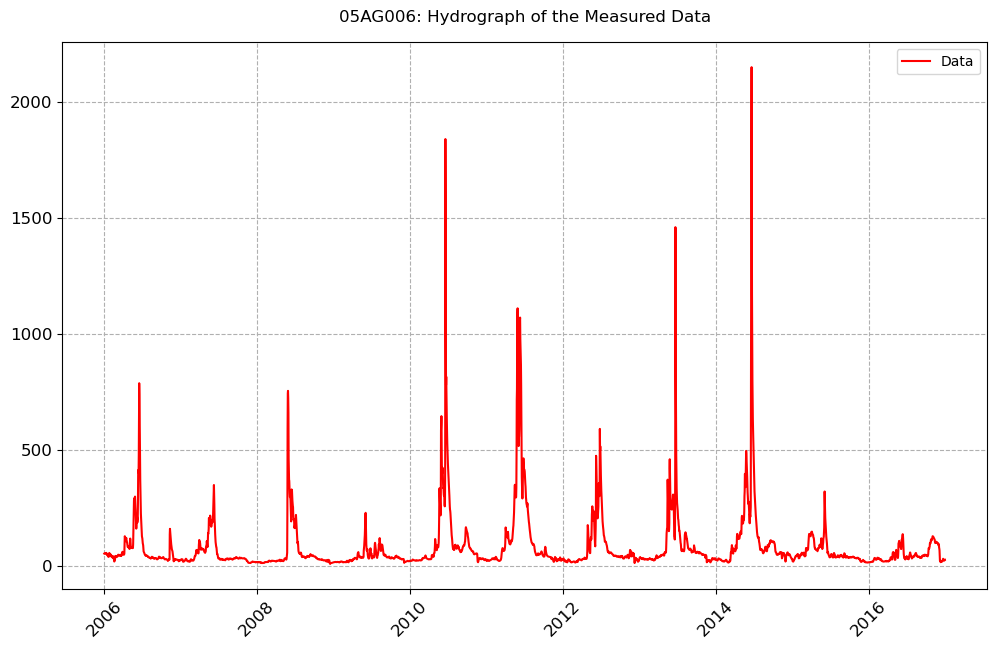

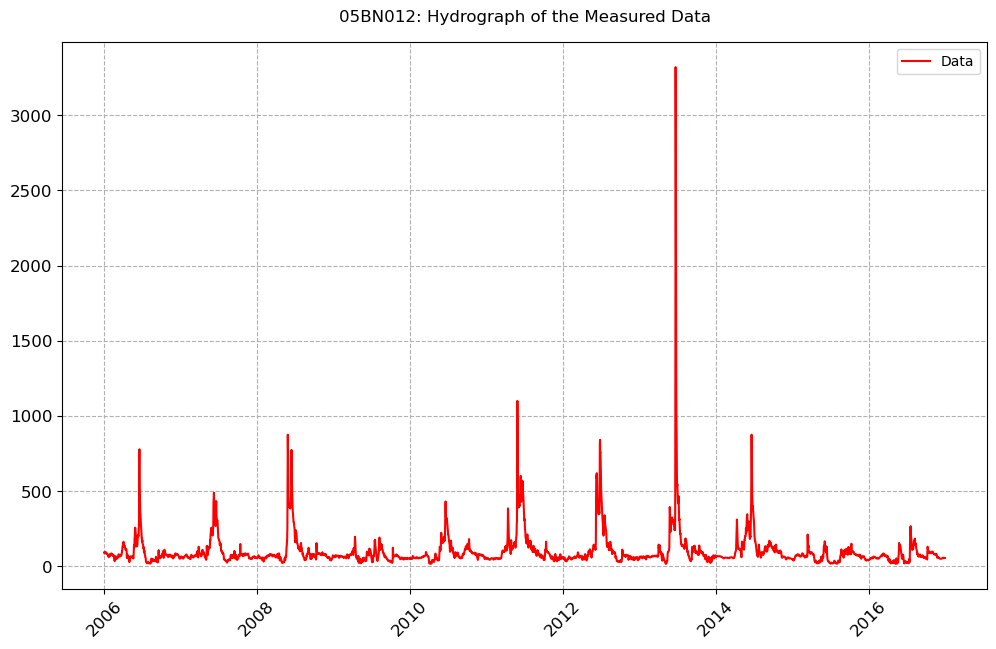

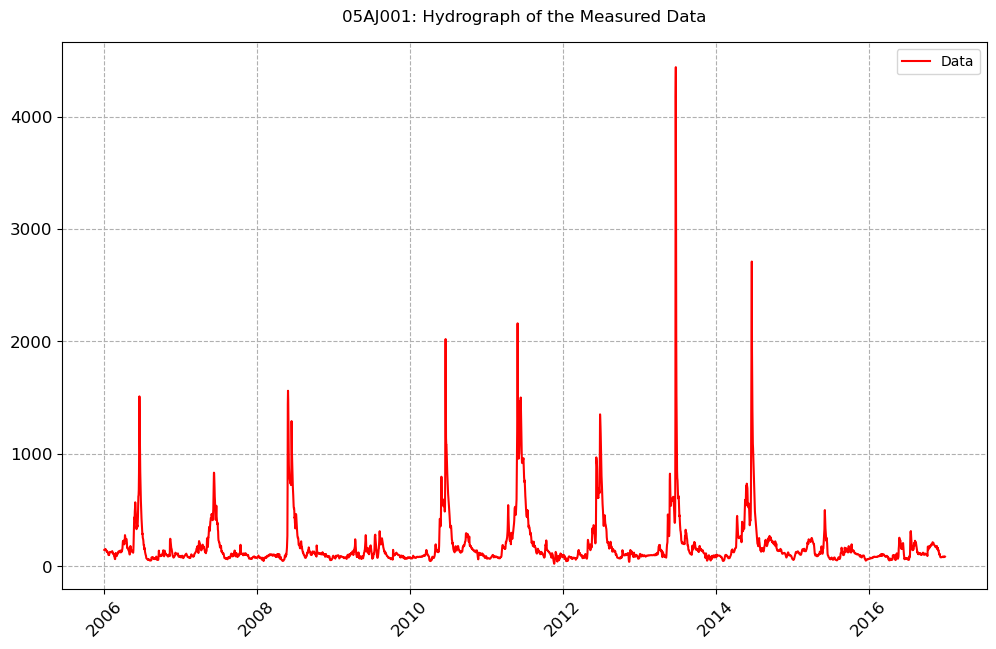

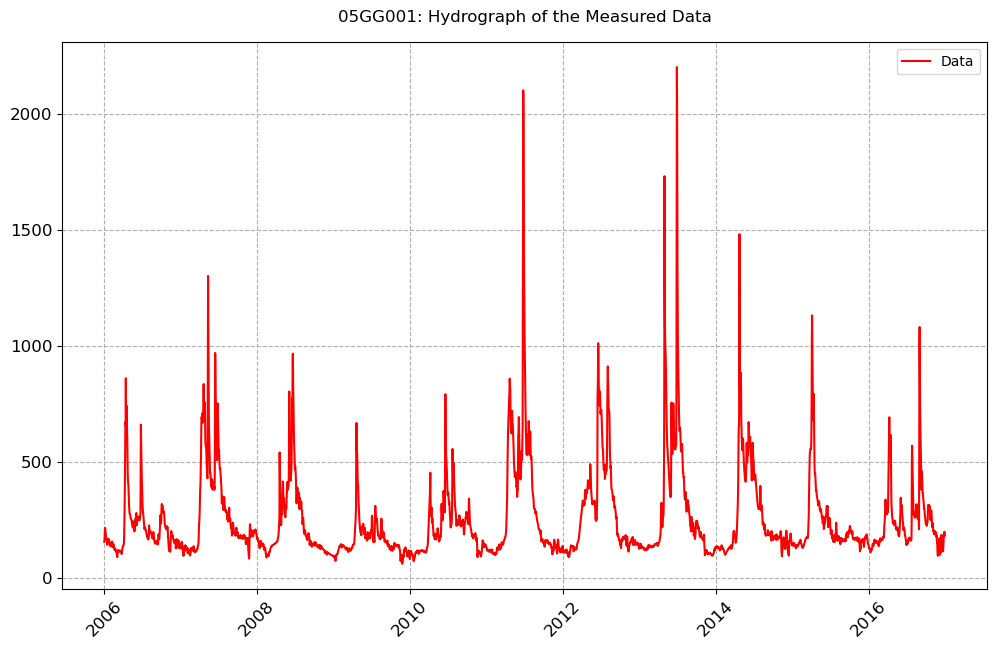

In [27]:
# A very simple line plot can be generated as shown below
# Just plotting the simulated data from the first station
visuals.plot(
    df = obs_df.loc[:, [f"QOMEAS_{col}" for col in stations_a if f"QOMEAS_{col}" in obs_df.columns]],
    title = [f"{i}: Hydrograph of the Measured Data" for i in stations_a],
    grid=True,
)

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 2. Number of legends provided is:  1. Applying Default legend names


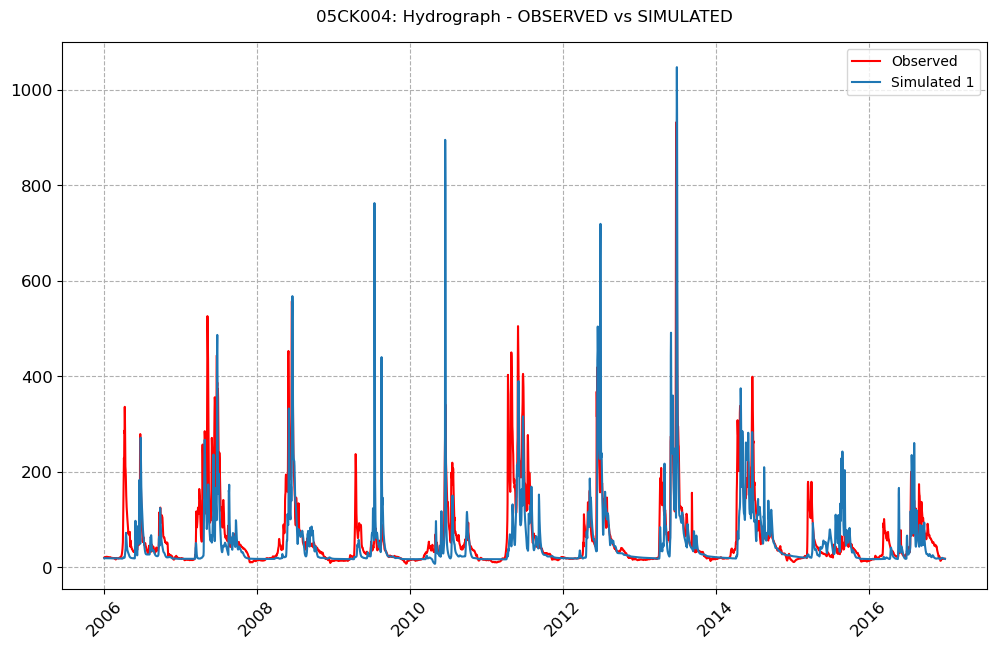

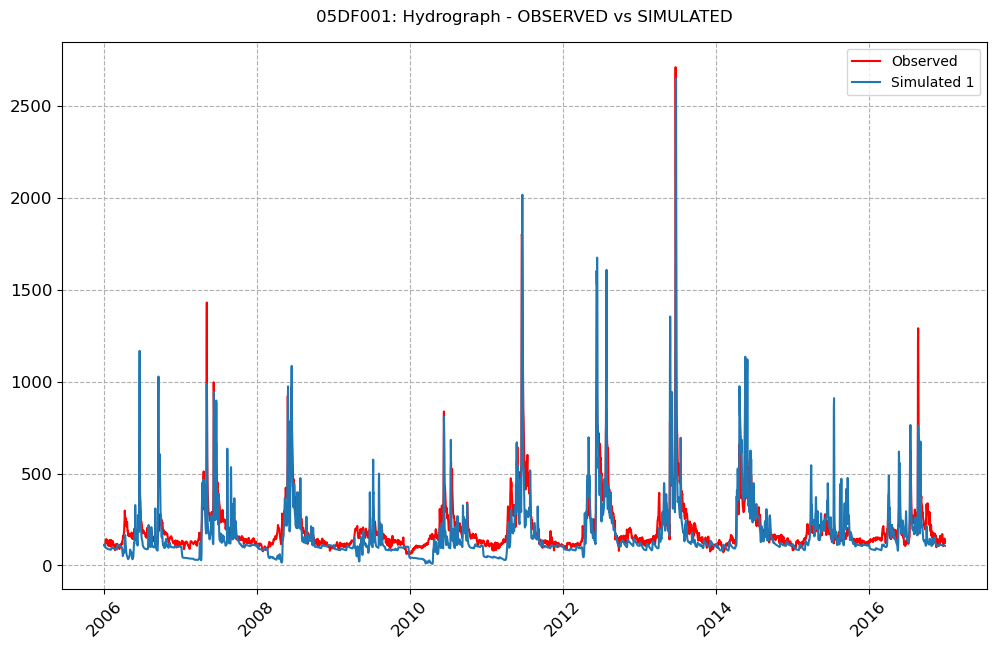

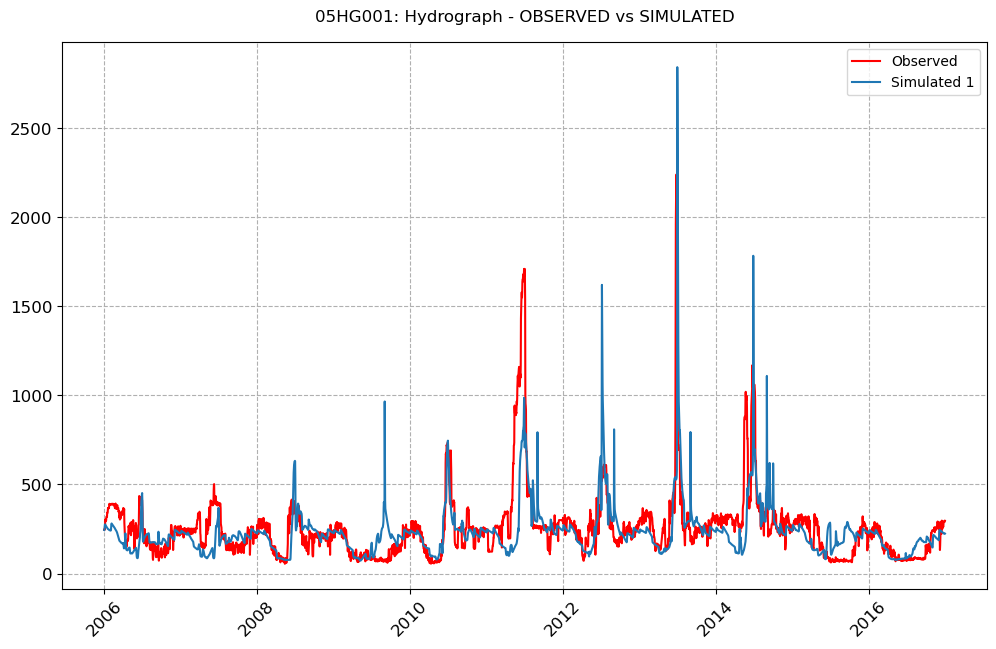

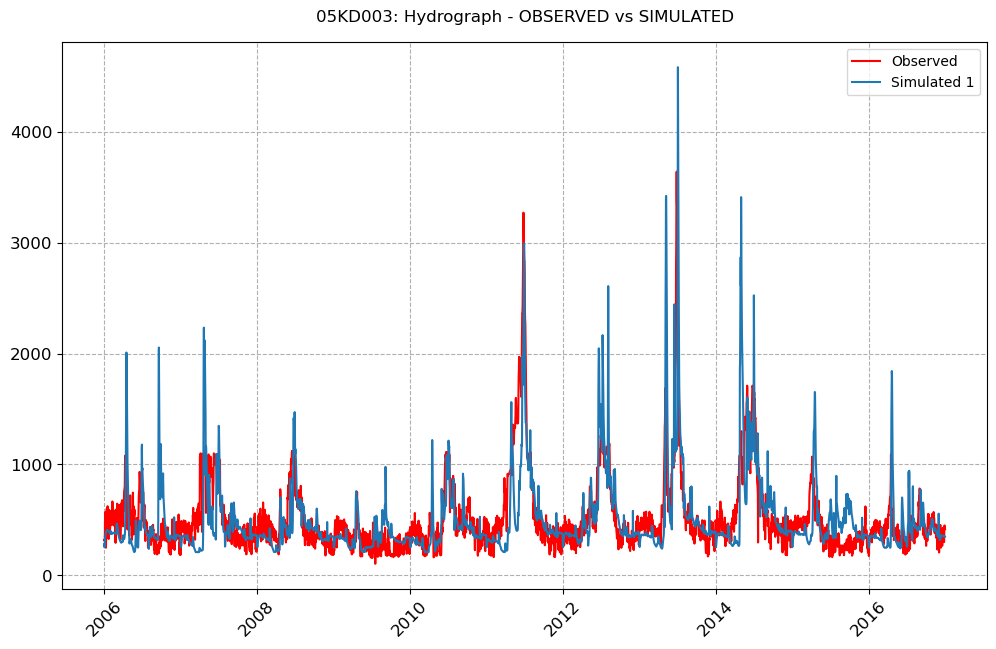

In [28]:
# Plotting both Observed and Simulated combined
visuals.plot(
    merged_df = merged_df.loc[:, [col for col in stations_b if col in merged_df.columns]],
    title = [f"{i}: Hydrograph - OBSERVED vs SIMULATED" for i in stations_b],
    grid=True,
)

Number of simulated data columns: 1


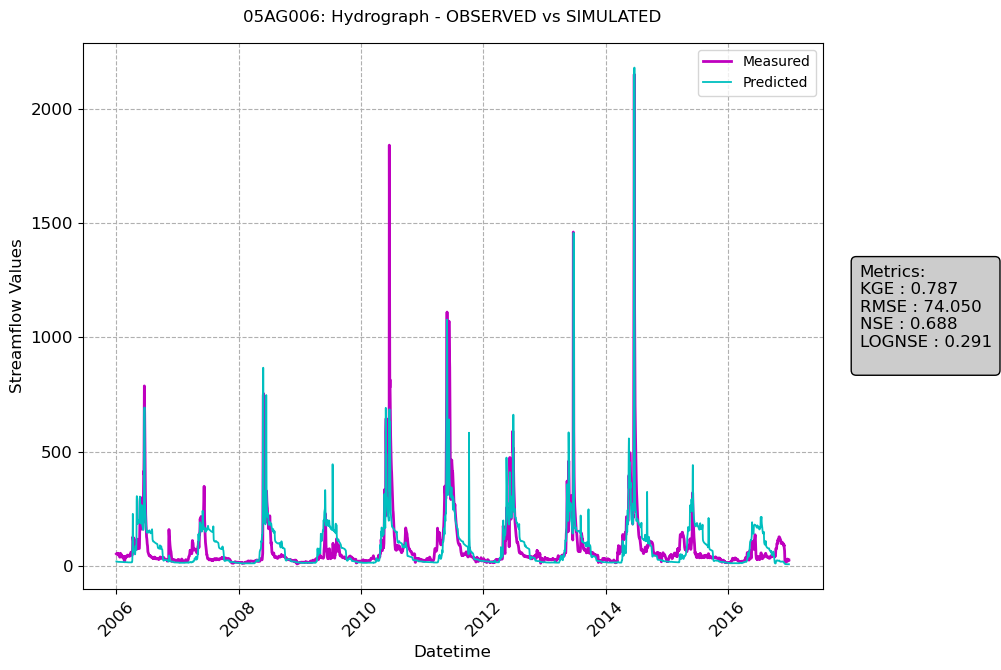

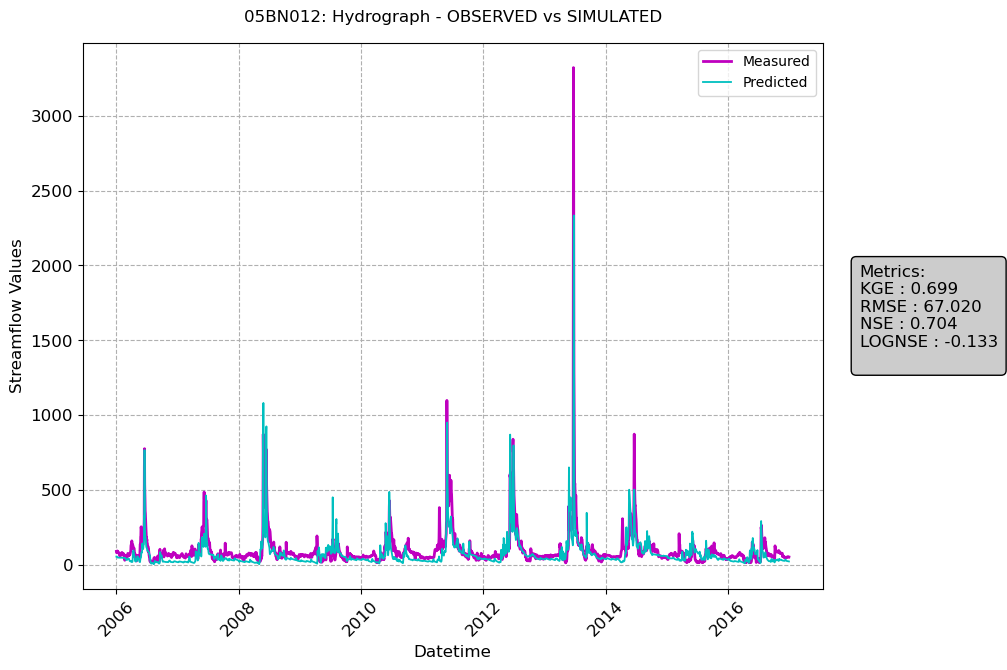

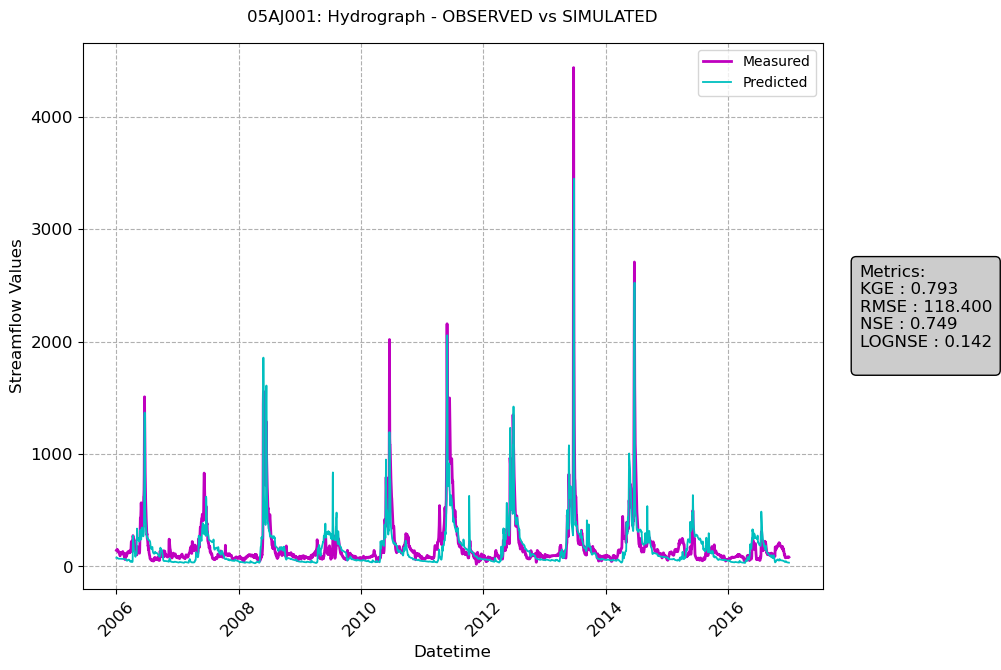

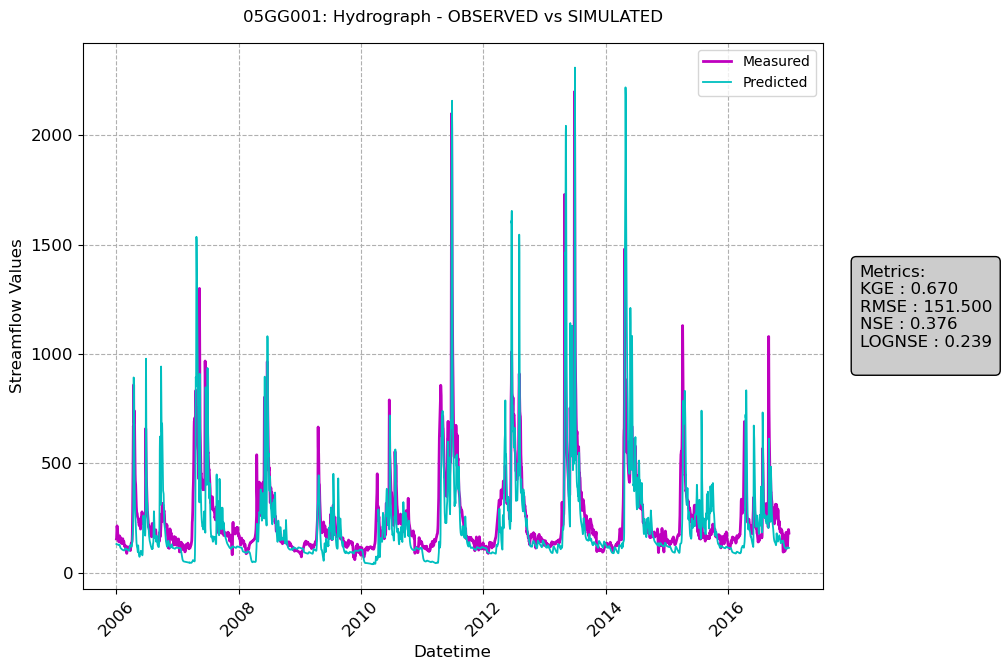

In [29]:
# Including the metrics in the plots for the 1st and 4th Stations
visuals.plot(
    merged_df = merged_df.loc[:, [col for col in stations_a if col in merged_df.columns]],
    # including multiple plot titles
    title = [f"{i}: Hydrograph - OBSERVED vs SIMULATED" for i in stations_a],
    fig_size=(10, 6),
    linestyles=('m-', 'c-'),
    labels=['Datetime', 'Streamflow Values'],
    legend=["Measured", "Predicted"],
    linewidth=(2, 1.3),
    # include metrics
    metrices = ['KGE', 'RMSE', 'NSE', 'LOGNSE'],
    grid=True,
    )

In [30]:
median = data.long_term_seasonal(df=merged_df, method = "median")
maxi = data.long_term_seasonal(df=merged_df, method = "max")
mini = data.long_term_seasonal(df=merged_df, method = "min")

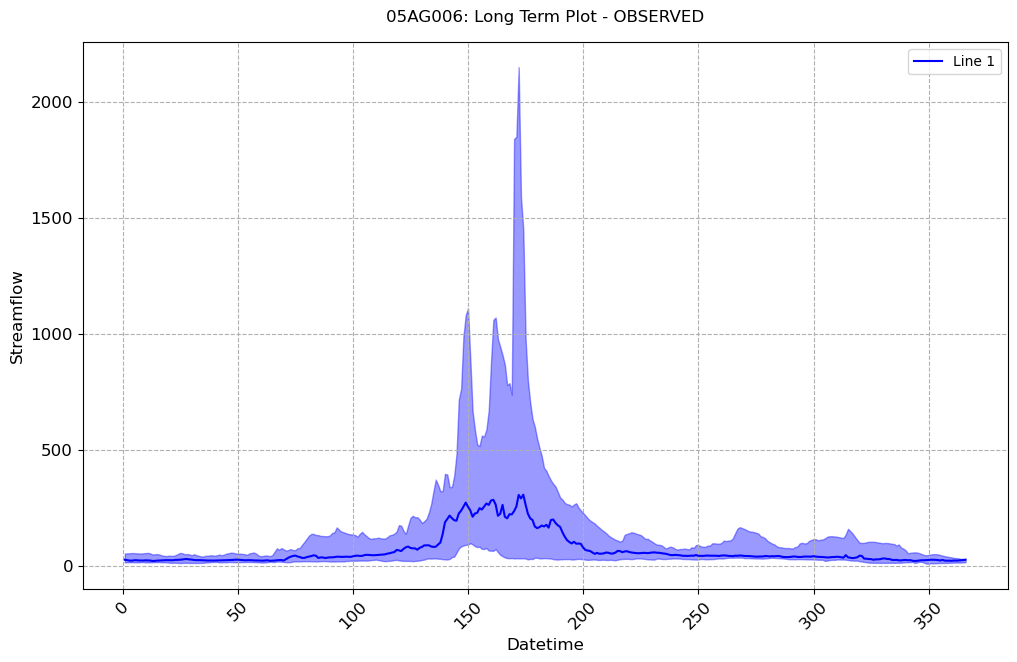

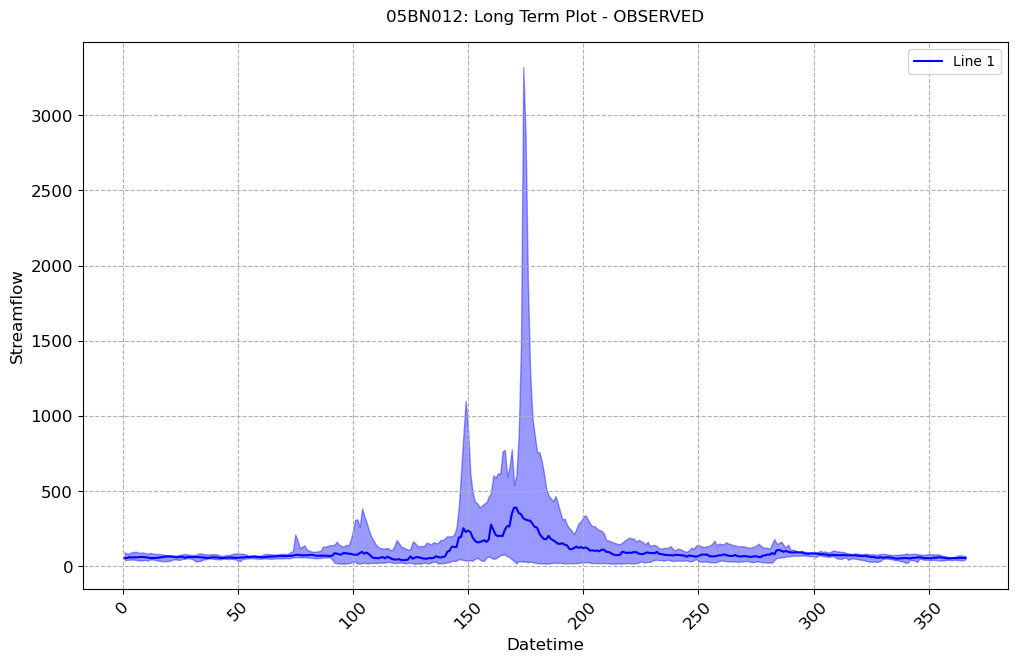

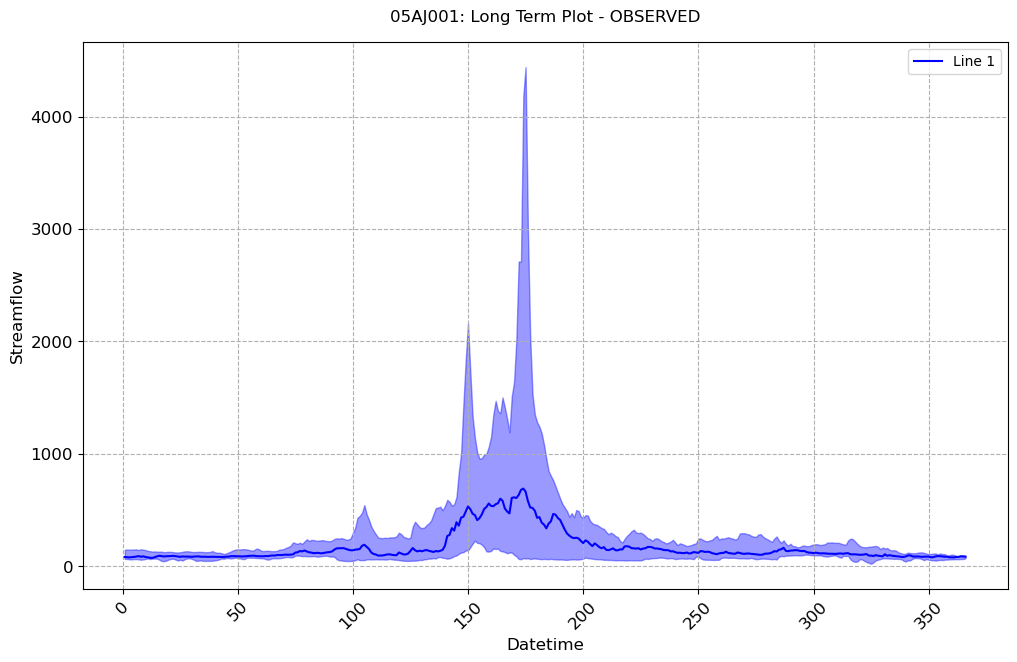

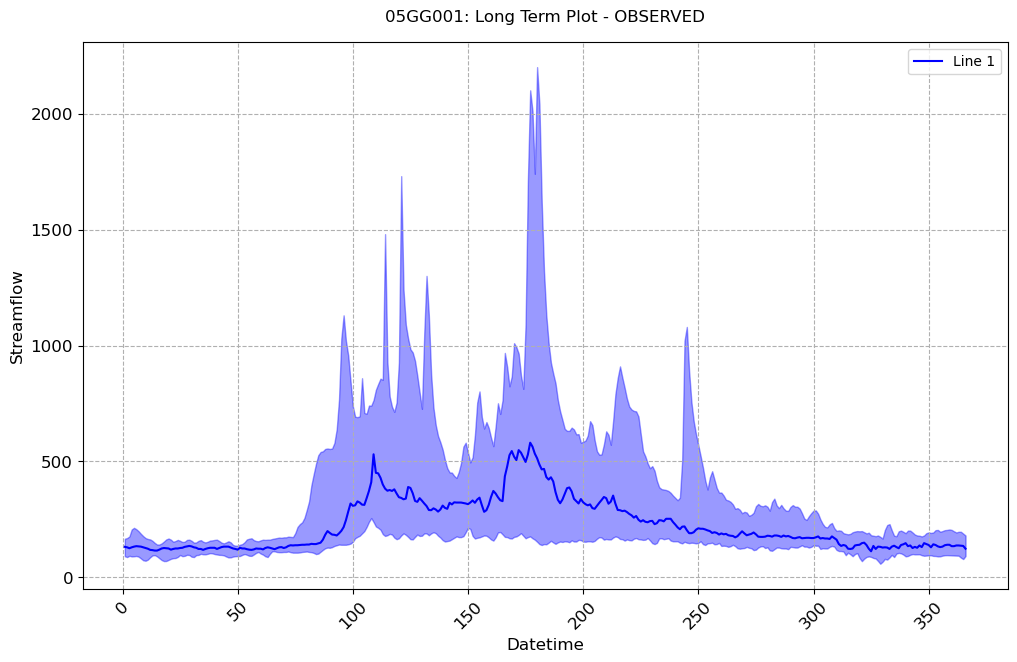

In [31]:
visuals.bounded_plot(
    lines = median.loc[:, [(col, 'QOMEAS') for col in stations_a if col in median.columns]],
    upper_bounds = [maxi.loc[:, [(col, 'QOMEAS') for col in stations_a if col in maxi.columns]]],
    lower_bounds = [mini.loc[:, [(col, 'QOMEAS') for col in stations_a if col in mini.columns]]],
    linestyles=['b-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    title = [f"{i}: Long Term Plot - OBSERVED" for i in stations_a]
    )

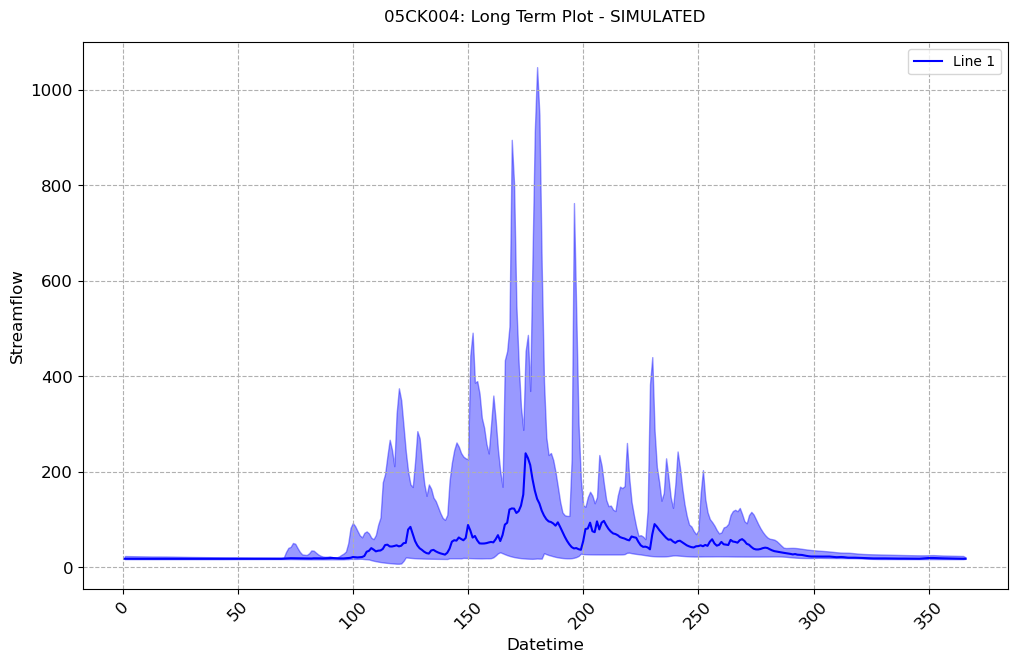

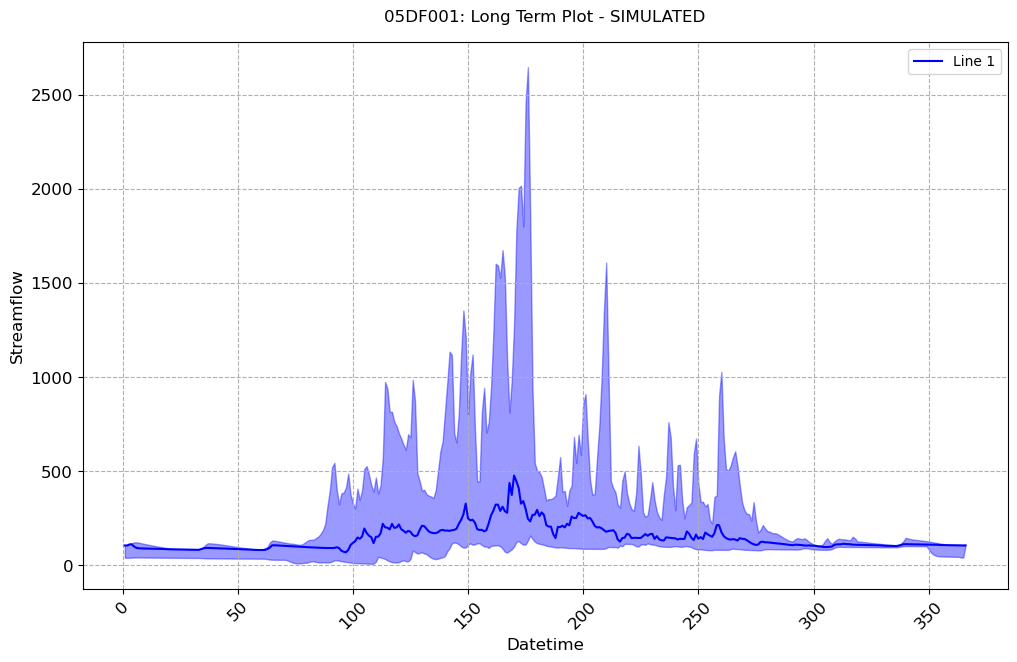

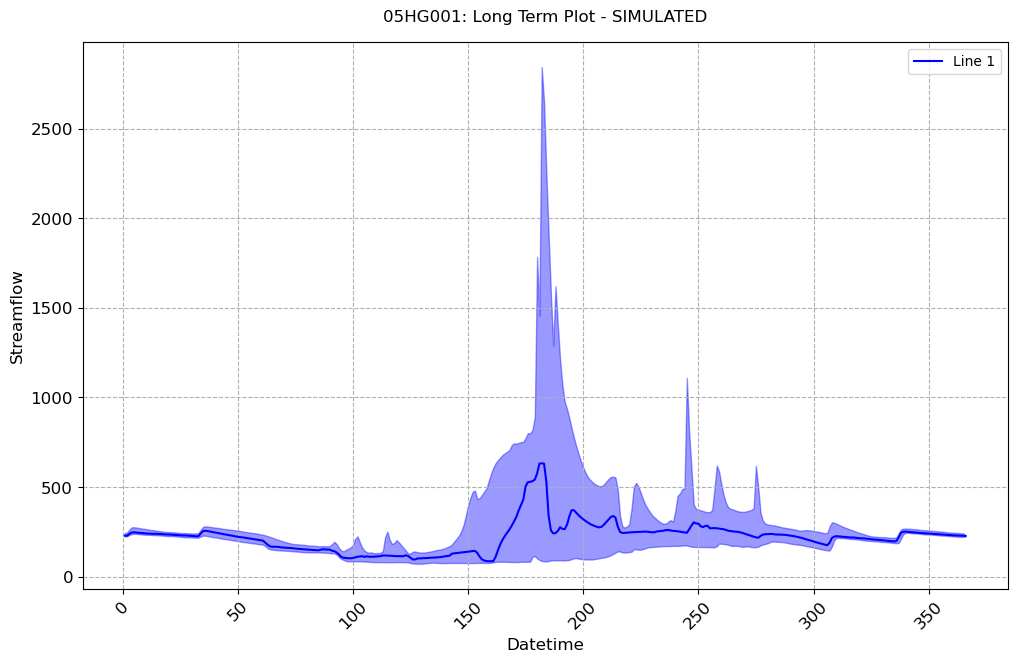

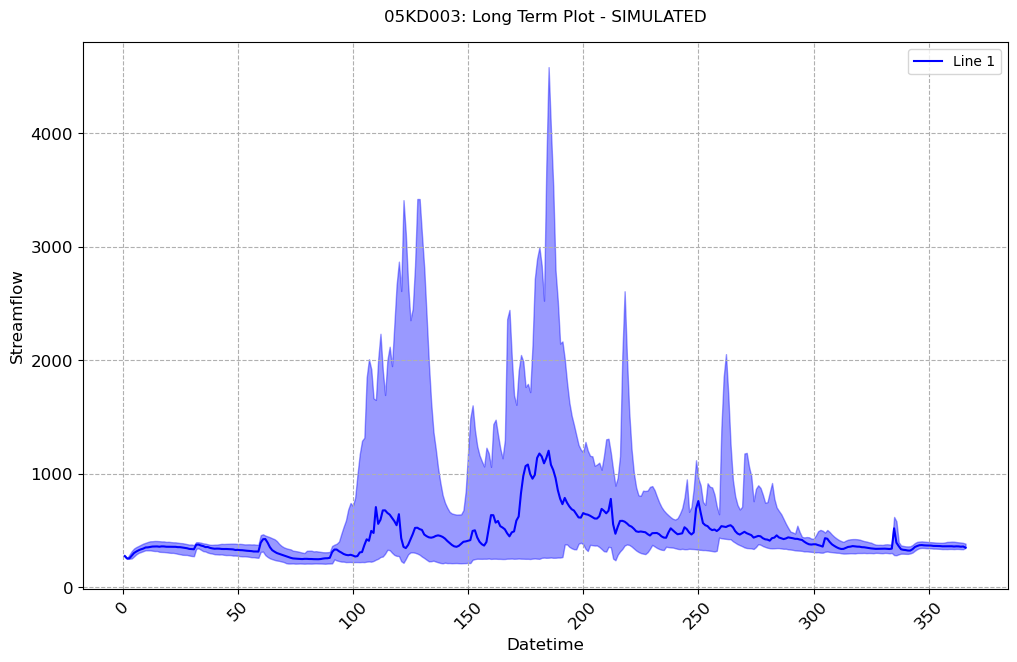

In [32]:
visuals.bounded_plot(
    lines = median.loc[:, [(col, 'QOSIM1') for col in stations_b if col in median.columns]],
    upper_bounds = [maxi.loc[:, [(col, 'QOSIM1') for col in stations_b if col in maxi.columns]]],
    lower_bounds = [mini.loc[:, [(col, 'QOSIM1') for col in stations_b if col in mini.columns]]],
    linestyles=['b-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    title = [f"{i}: Long Term Plot - SIMULATED" for i in stations_b]
    )

Number of linewidths provided is less than the number of lines to plot. Number of lines : 2. Number of linewidths provided is:  1. Defaulting to 1.5


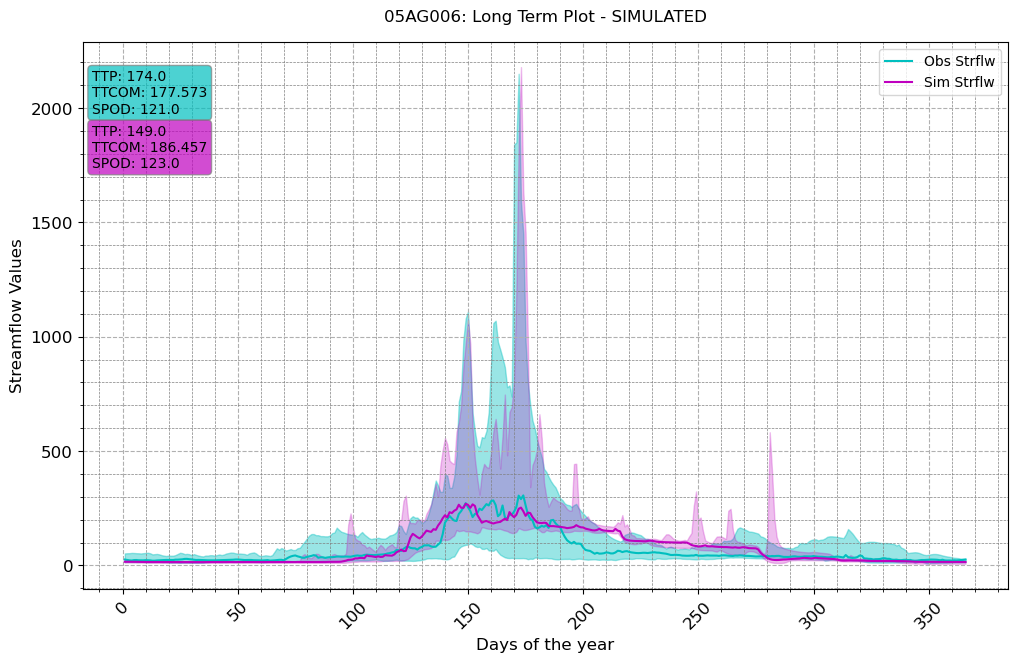

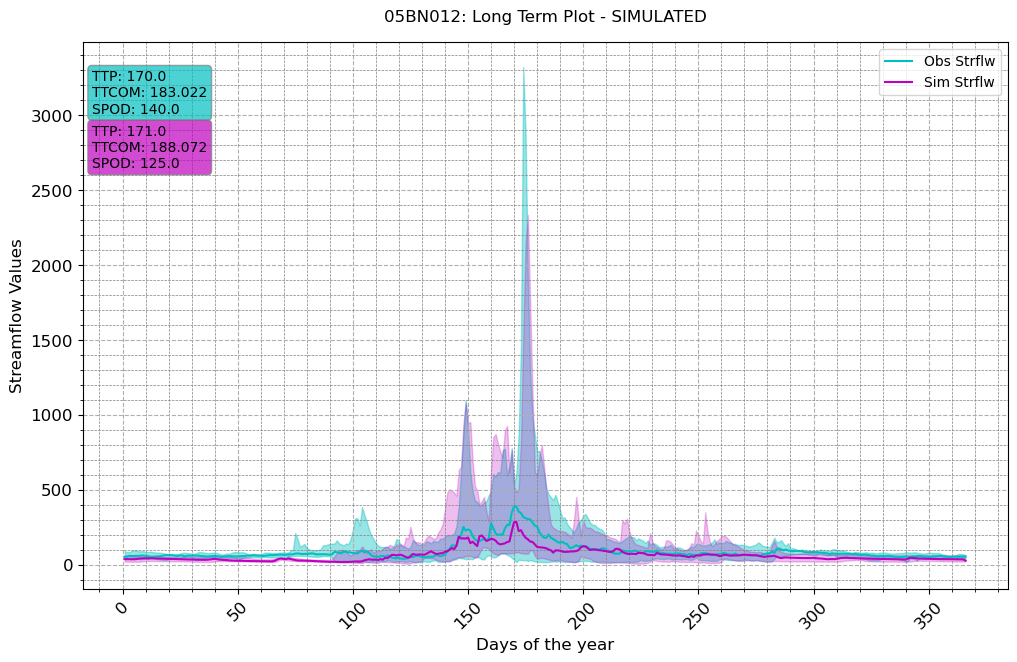

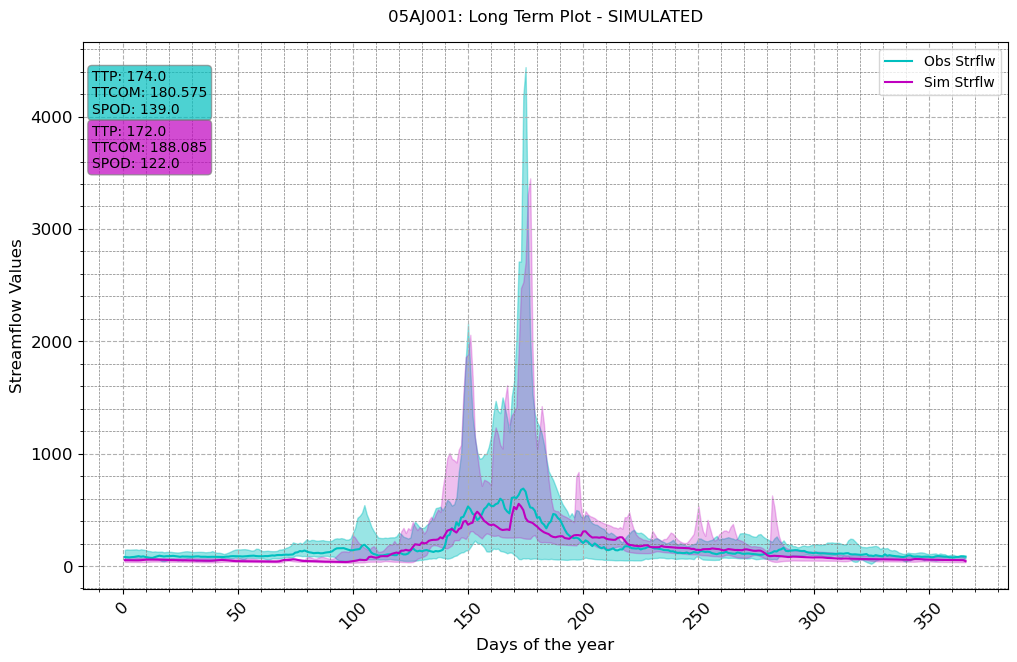

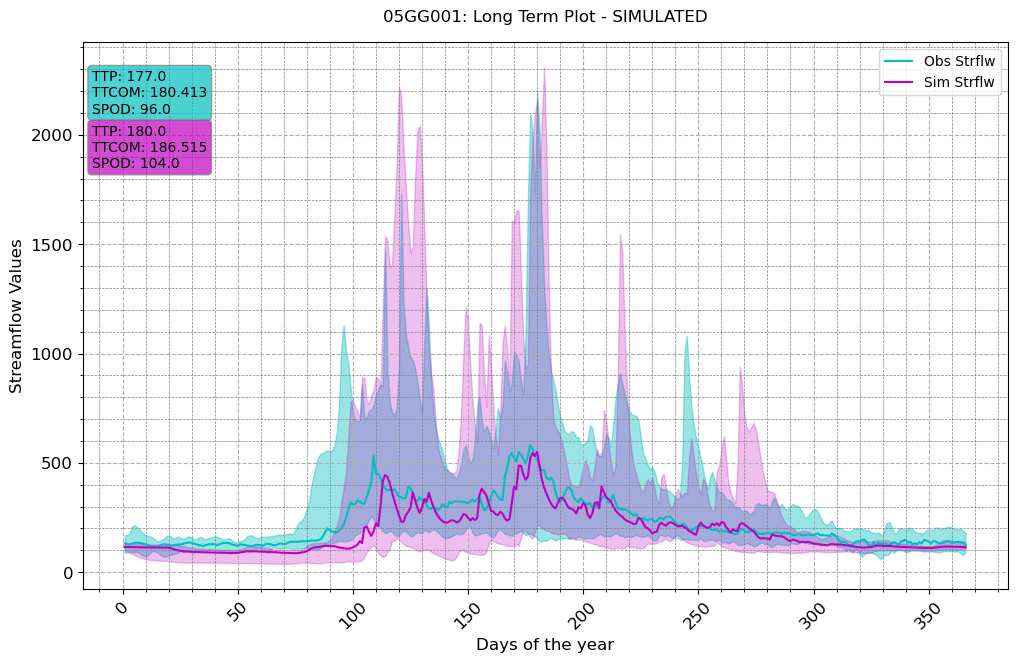

In [33]:
visuals.bounded_plot(
    lines = [median.loc[:, [(col, 'QOMEAS') for col in stations_a if col in median.columns]],
             median.loc[:, [(col, 'QOSIM1') for col in stations_a if col in median.columns]]],
    upper_bounds = [maxi.loc[:, [(col, 'QOMEAS') for col in stations_a if col in maxi.columns]], 
                    maxi.loc[:, [(col, 'QOSIM1') for col in stations_a if col in maxi.columns]]],
    lower_bounds = [mini.loc[:, [(col, 'QOMEAS') for col in stations_a if col in mini.columns]],
                    mini.loc[:, [(col, 'QOSIM1') for col in stations_a if col in mini.columns]]],
    legend = ['Obs Strflw','Sim Strflw'],
    linestyles=['c-', 'm-',],
    labels=['Days of the year', 'Streamflow Values'],
    transparency = [0.4, 0.25],
    metrices=["TTP", "TTCOM", "SPOD"],
    title = [f"{i}: Long Term Plot - SIMULATED" for i in stations_a],
    grid = True, minor_grid = True, text_size=10
    )

Number of linewidths provided is less than the number of lines to plot. Number of lines : 2. Number of linewidths provided is:  1. Defaulting to 1.5


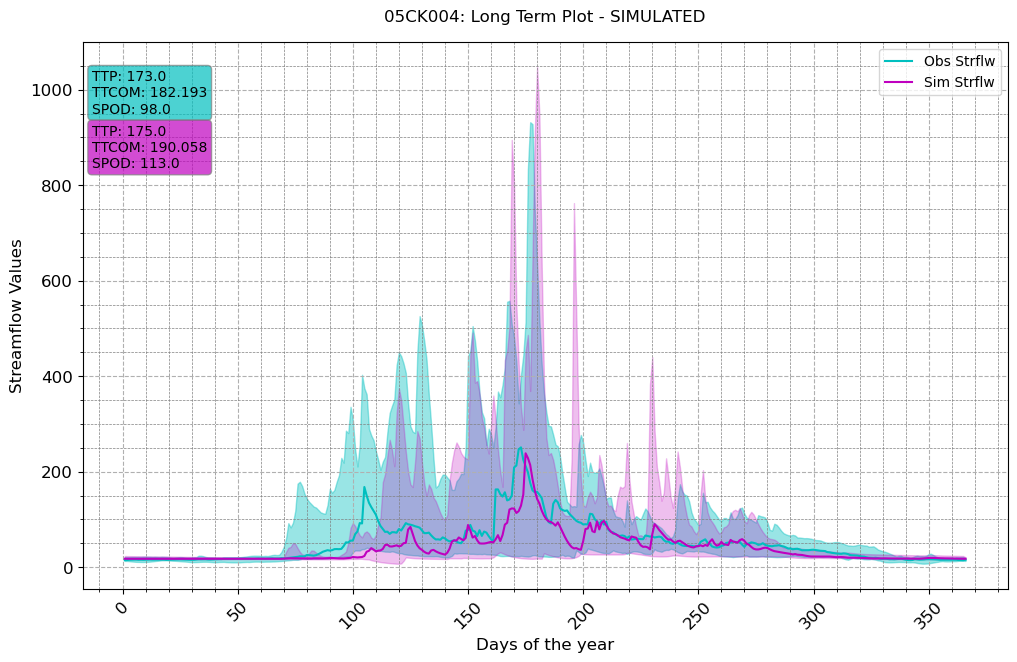

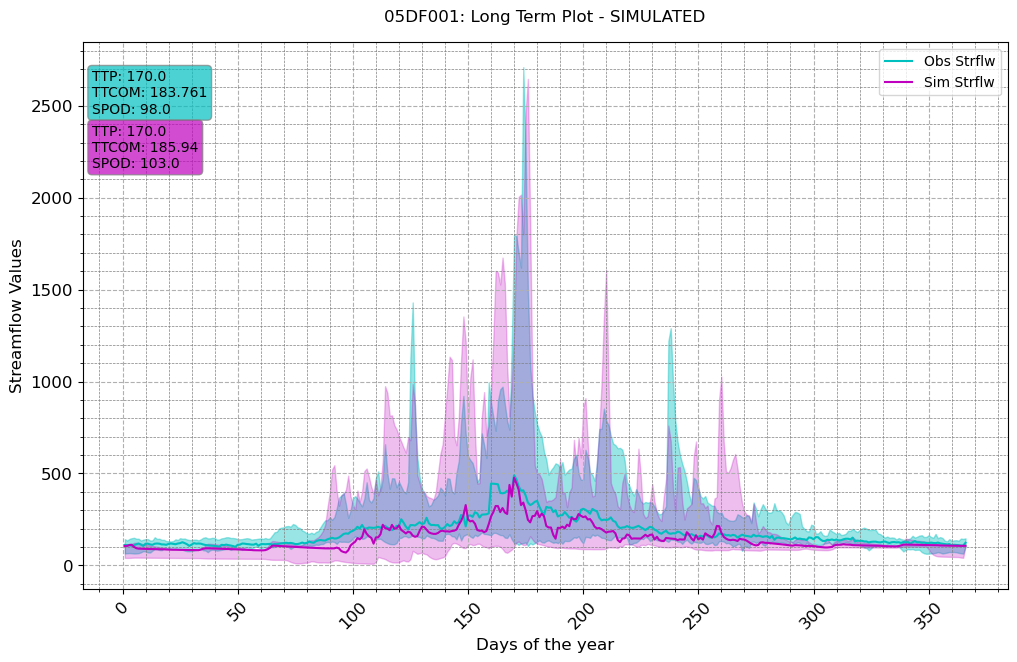

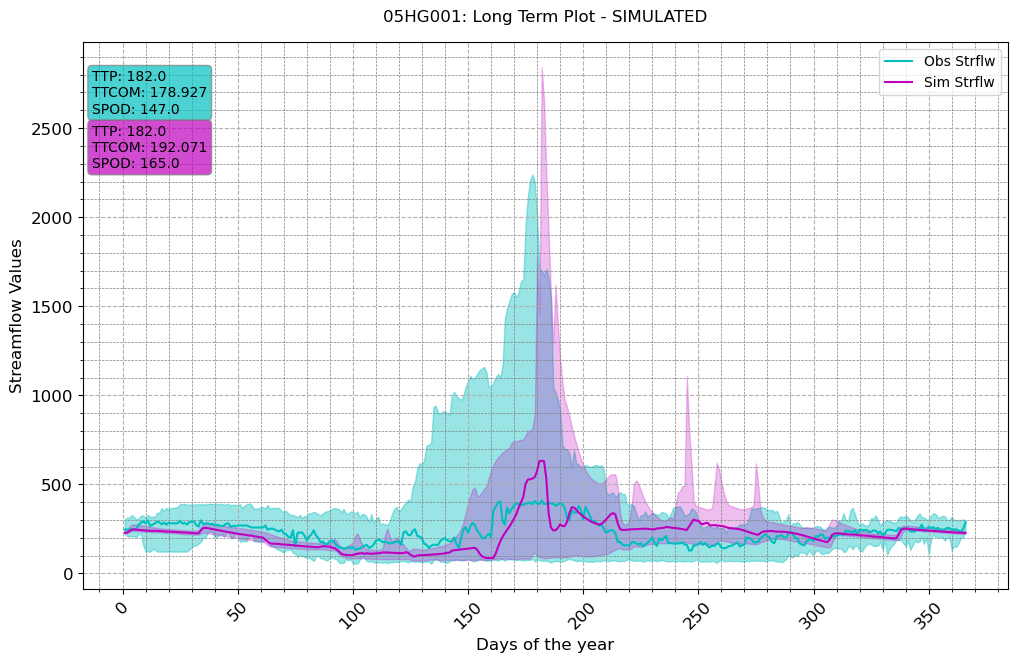

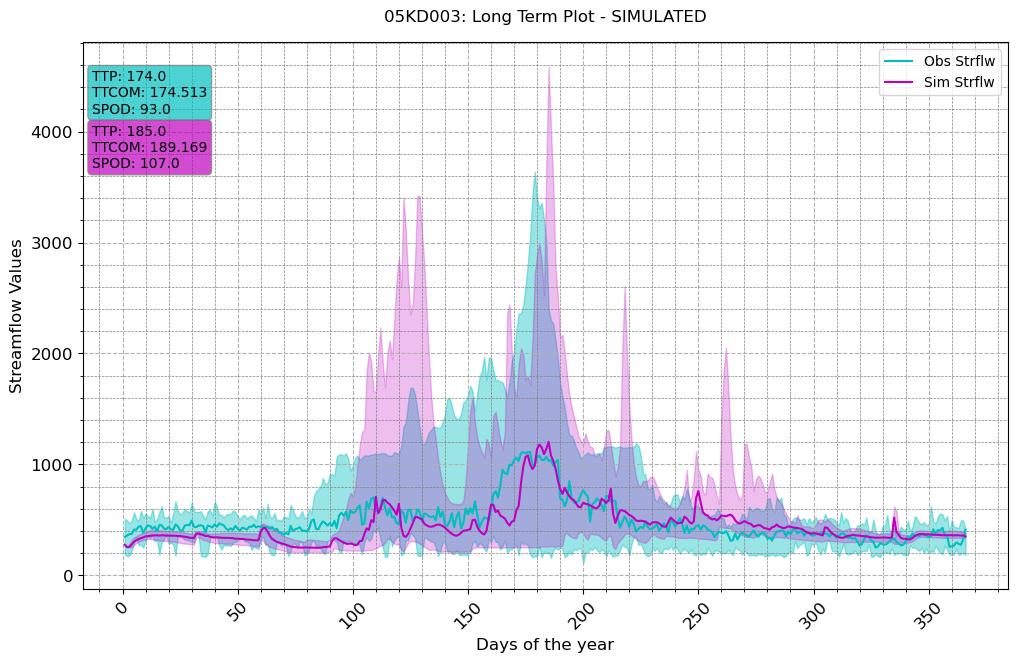

In [34]:
visuals.bounded_plot(
    lines = [median.loc[:, [(col, 'QOMEAS') for col in stations_b if col in median.columns]],
             median.loc[:, [(col, 'QOSIM1') for col in stations_b if col in median.columns]]],
    upper_bounds = [maxi.loc[:, [(col, 'QOMEAS') for col in stations_b if col in maxi.columns]], 
                    maxi.loc[:, [(col, 'QOSIM1') for col in stations_b if col in maxi.columns]]],
    lower_bounds = [mini.loc[:, [(col, 'QOMEAS') for col in stations_b if col in mini.columns]],
                    mini.loc[:, [(col, 'QOSIM1') for col in stations_b if col in mini.columns]]],
    legend = ['Obs Strflw','Sim Strflw'],
    linestyles=['c-', 'm-',],
    labels=['Days of the year', 'Streamflow Values'],
    transparency = [0.4, 0.25],
    metrices=["TTP", "TTCOM", "SPOD"],
    title = [f"{i}: Long Term Plot - SIMULATED" for i in stations_b],
    grid = True, minor_grid = True, text_size=10
    )

Number of simulated data columns: 1


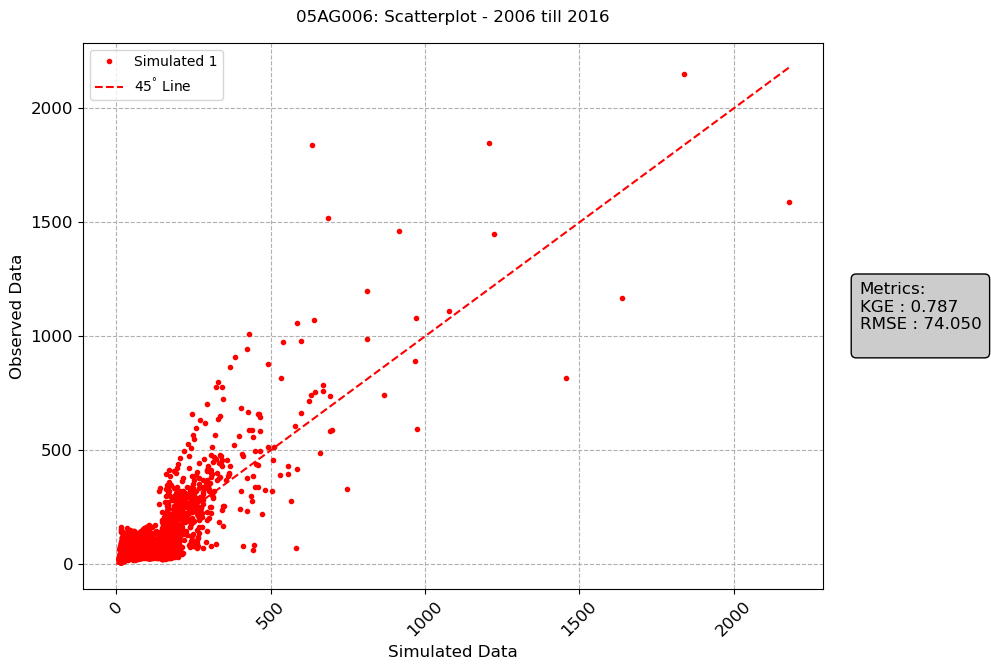

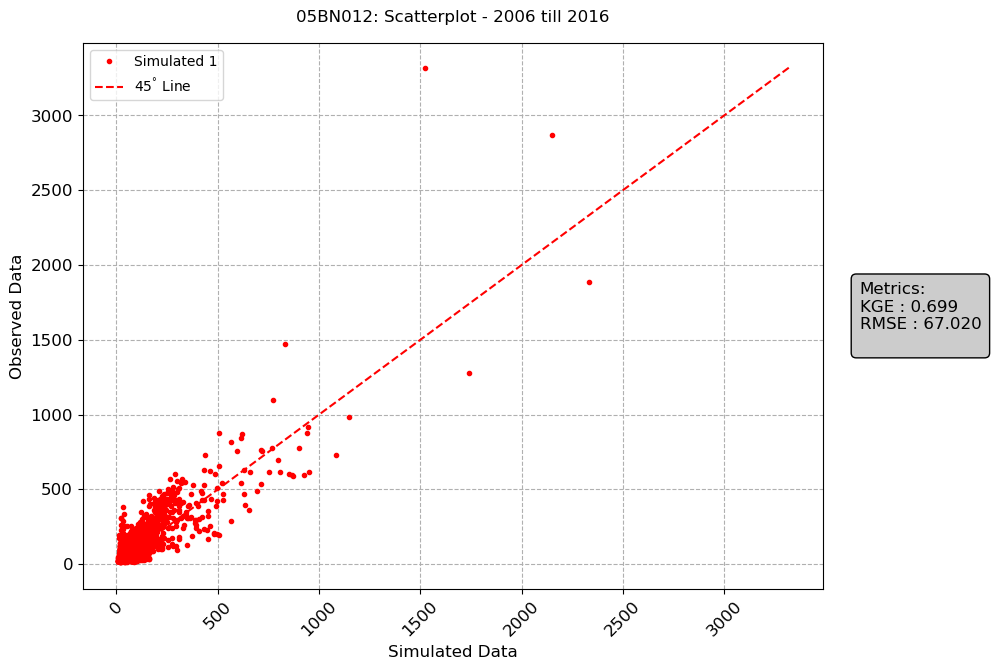

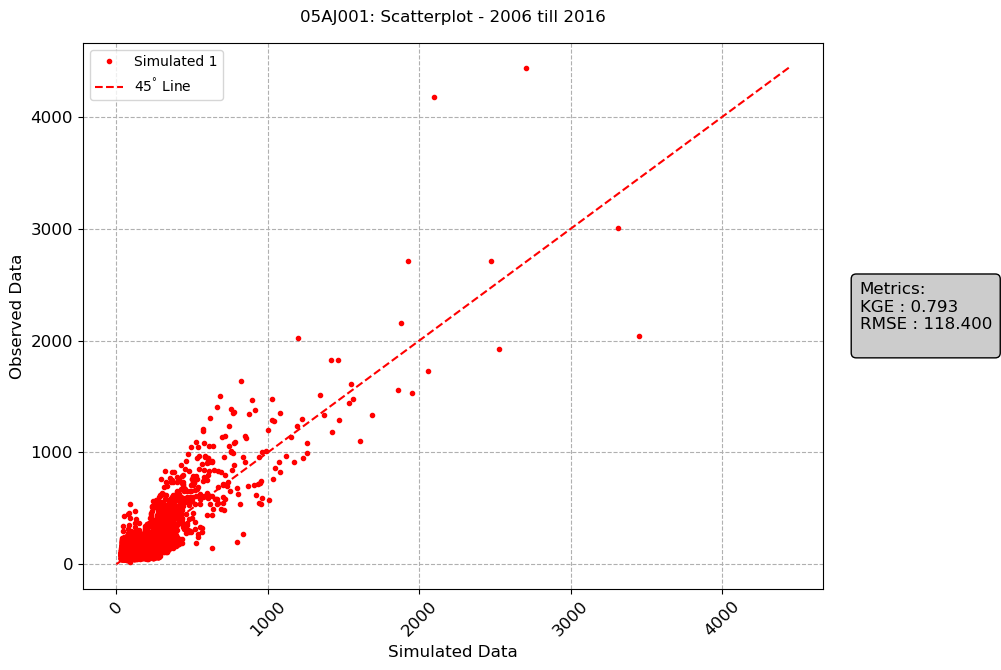

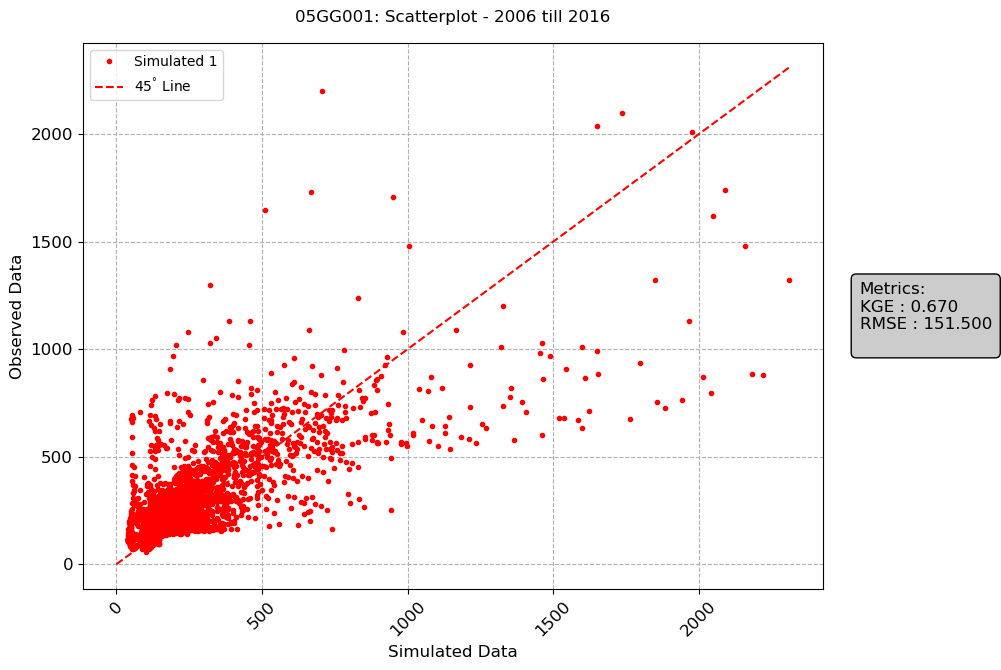

In [35]:
visuals.scatter(merged_df = merged_df.loc[:, [col for col in stations_a if col in merged_df.columns]],
               grid = True,
               labels = ("Simulated Data", "Observed Data"),
               markerstyle = ['r.'],
               title = [f"{i}: Scatterplot - 2006 till 2016" for i in stations_a],
               line45 = True,
               metrices = ['KGE', 'RMSE'],
               )

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:242: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


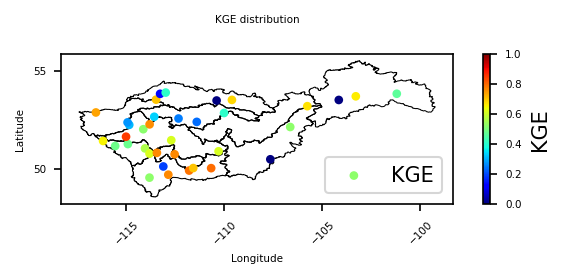

In [36]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = "KGE distribution",
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "KGE",
    fig_size = (10, 10),
    font_size=5, 
    markersize=10,
    observed = obs_df,
    simulated = sim_df,
    labels=['Longitude', 'Latitude'],
    vmin = 0,
    vmax=1,
)

C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\visuals.py:242: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


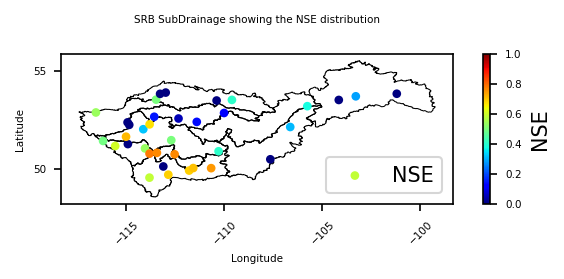

In [37]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = "SRB SubDrainage showing the NSE distribution",
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "NSE",
    fig_size = (10, 10),
    font_size=5, 
    markersize=10,
    observed = obs_df,
    simulated = sim_df,
    labels=['Longitude', 'Latitude'],
    vmin = 0,
    vmax=1,
)

Number of simulated data columns: 1


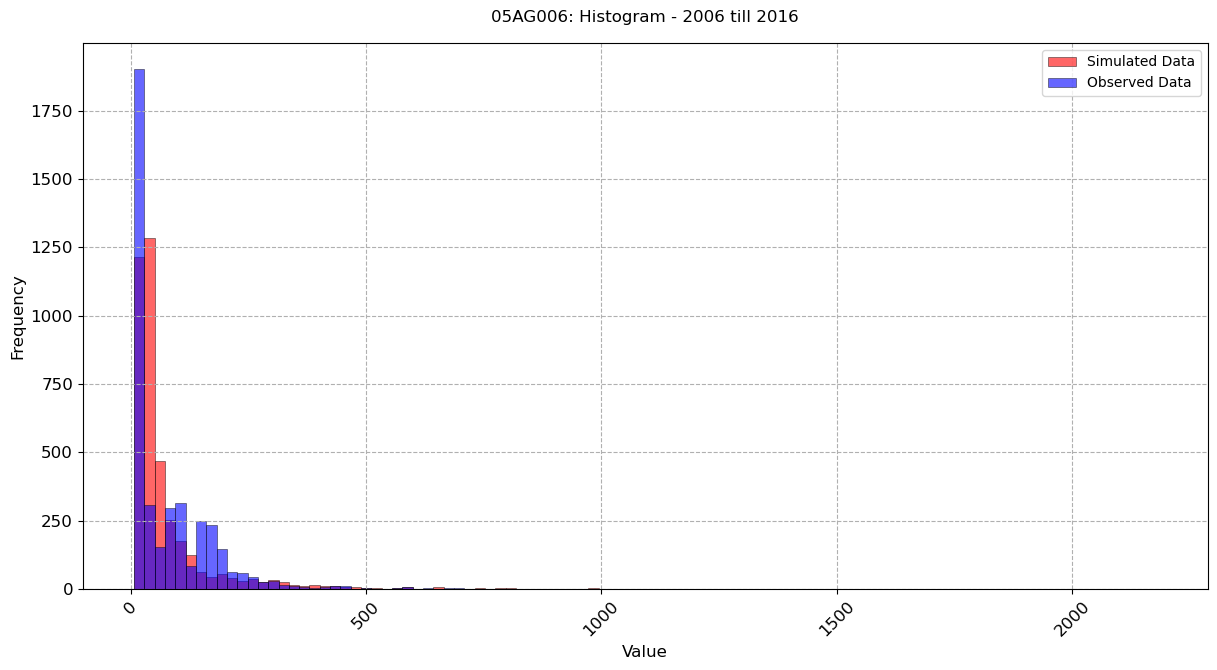

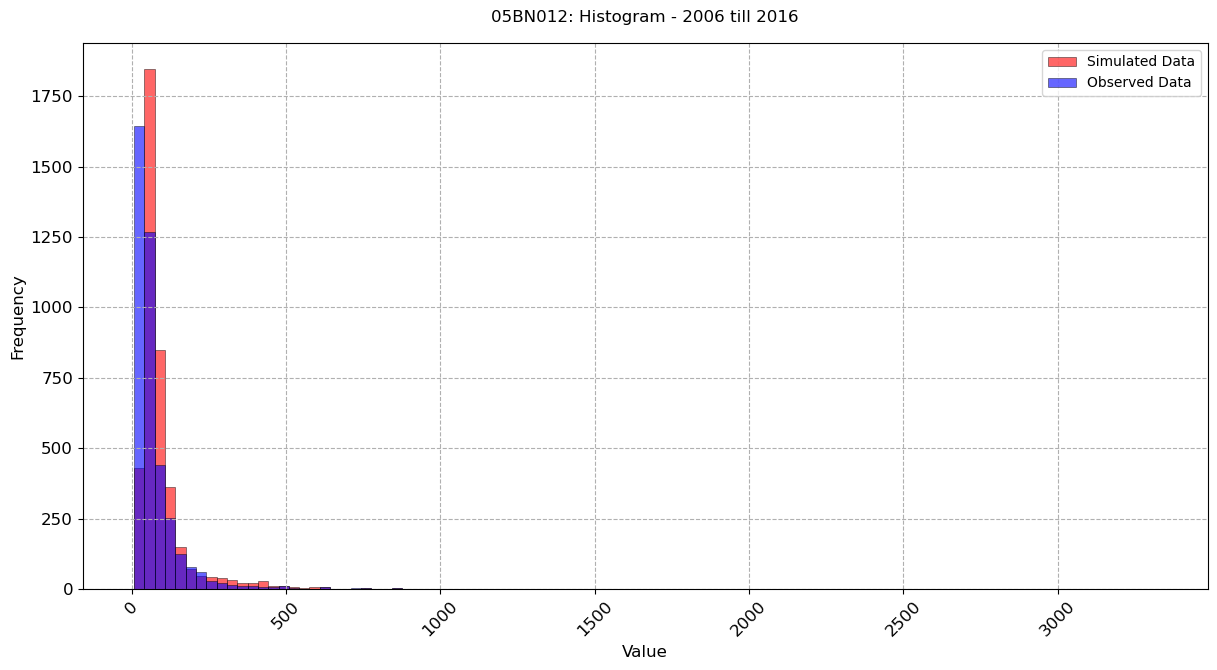

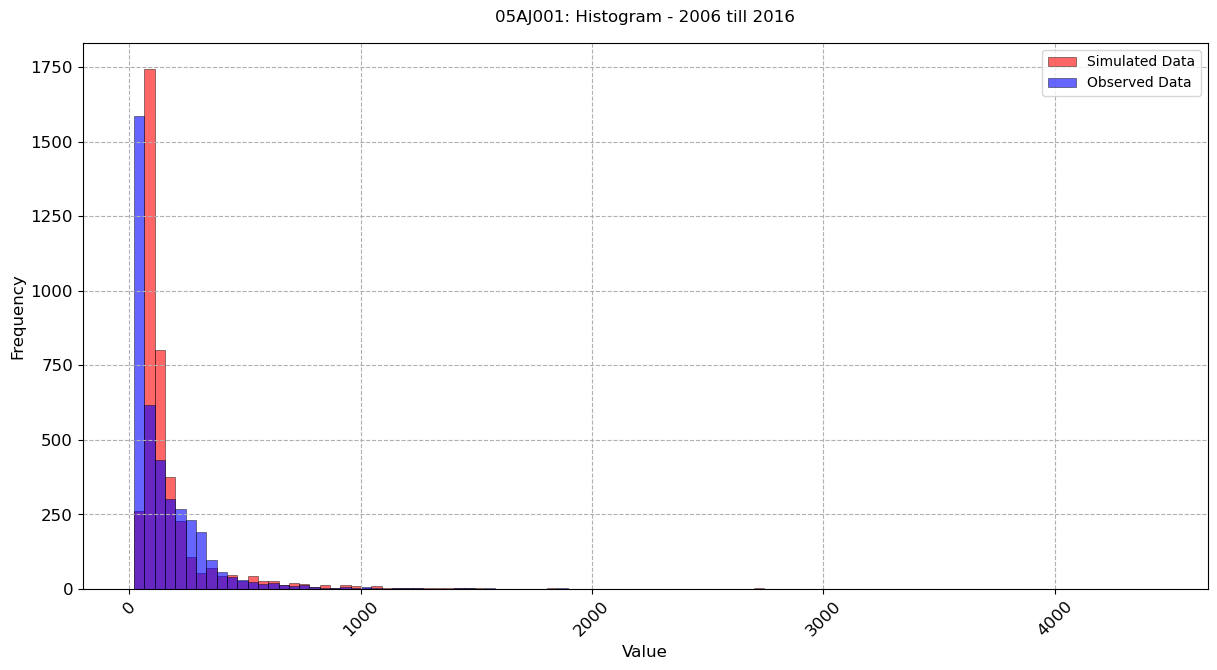

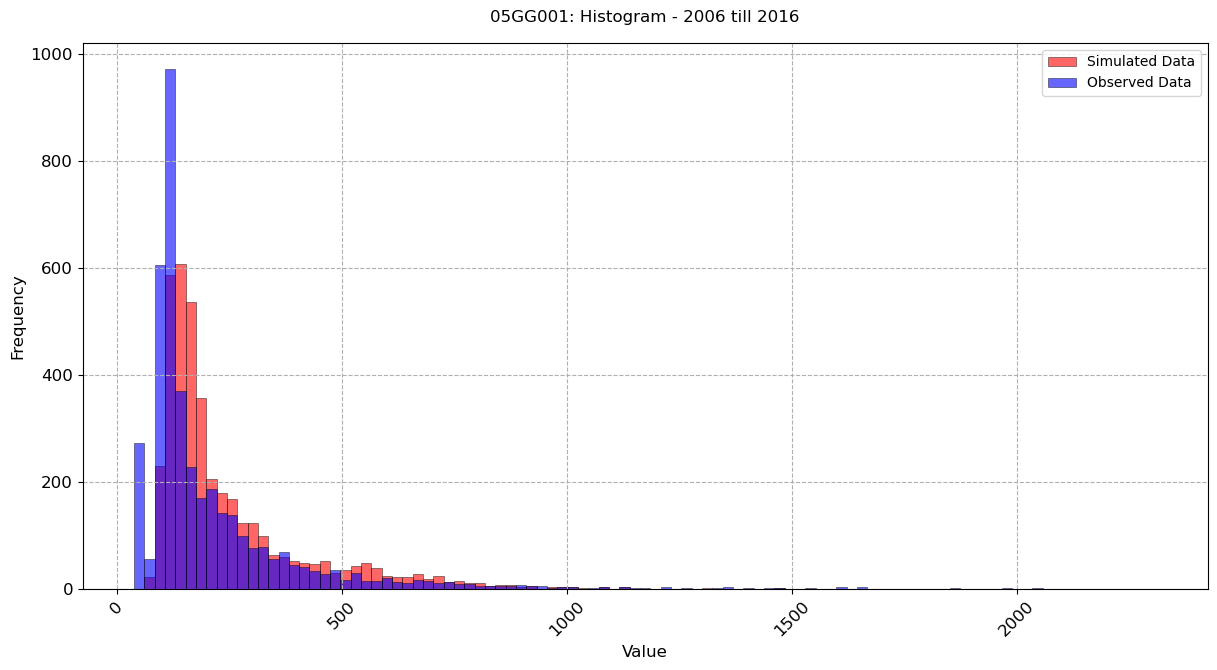

In [38]:
visuals.histogram(
    merged_df = merged_df.loc[:, [col for col in stations_a if col in merged_df.columns]],
    grid = True,
    title = [f"{i}: Histogram - 2006 till 2016" for i in stations_a],
)

Number of simulated data columns: 1


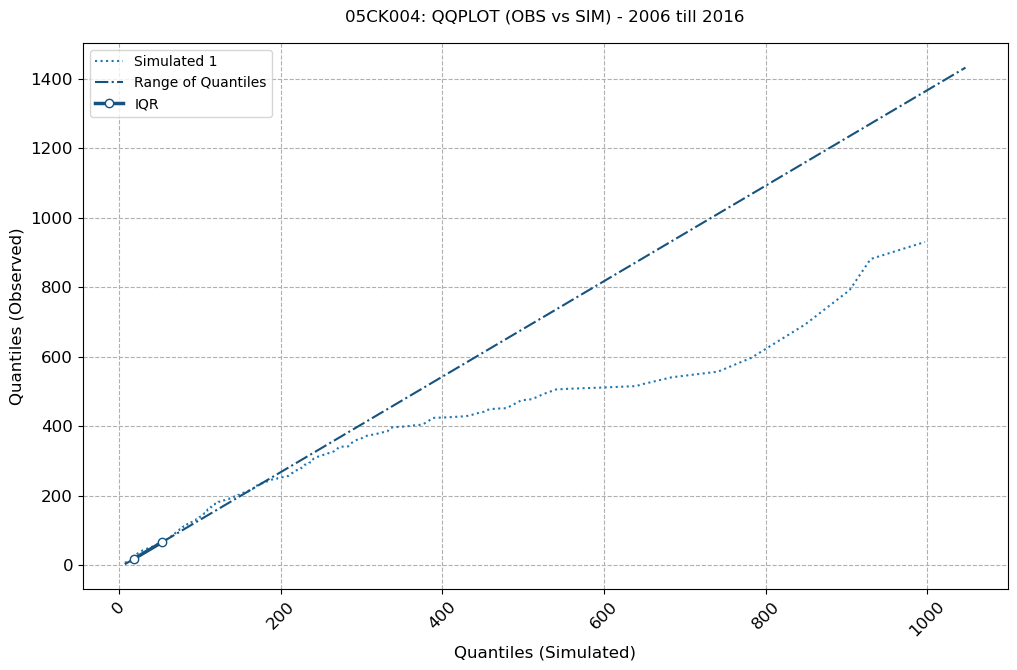

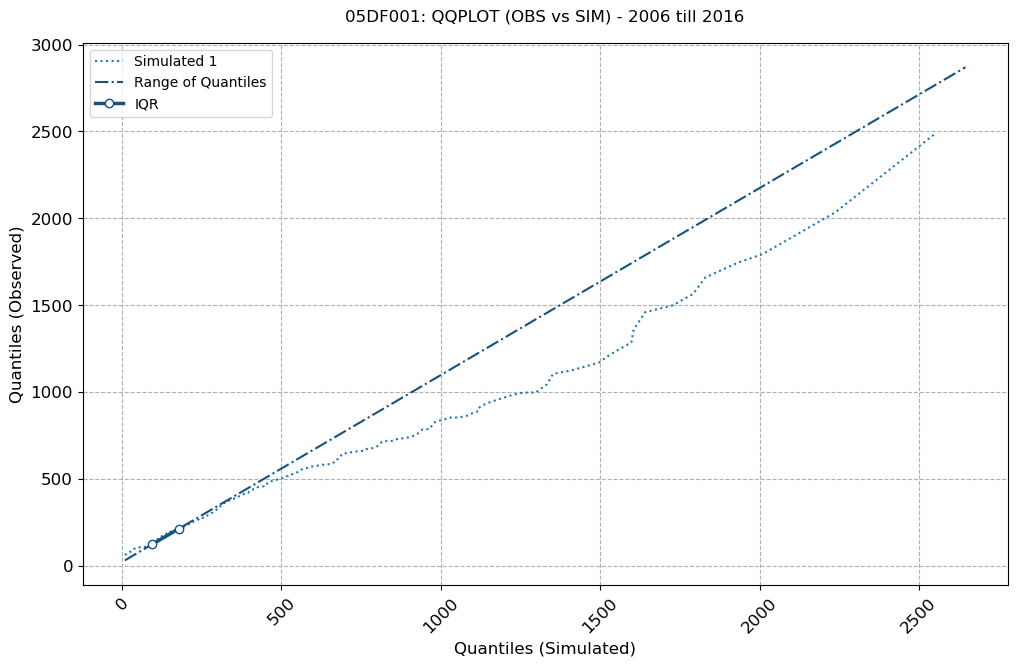

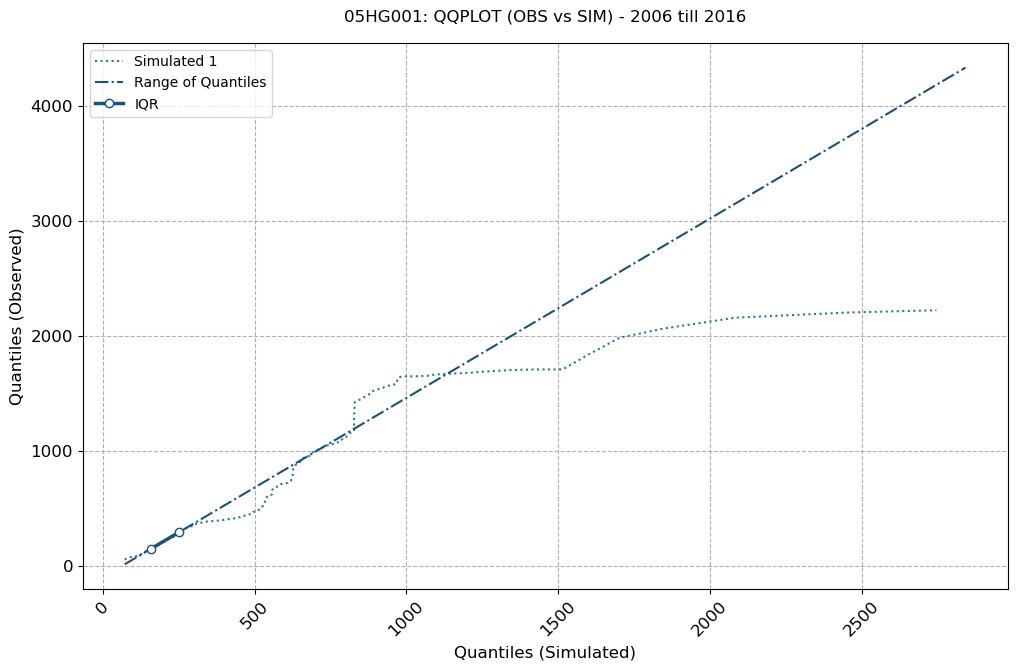

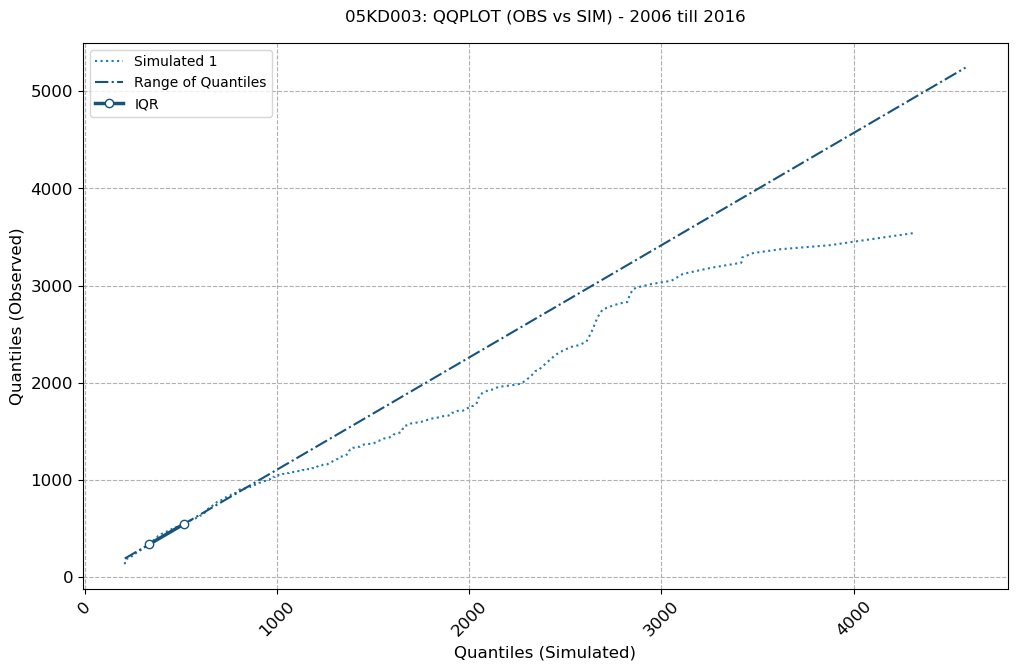

In [39]:
visuals.qqplot(
    merged_df =merged_df.loc[:, [col for col in stations_b if col in merged_df.columns]],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title=[f"{i}: QQPLOT (OBS vs SIM) - 2006 till 2016" for i in stations_b],
    grid = True
)

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 2. Number of legends provided is:  1. Applying Default legend names


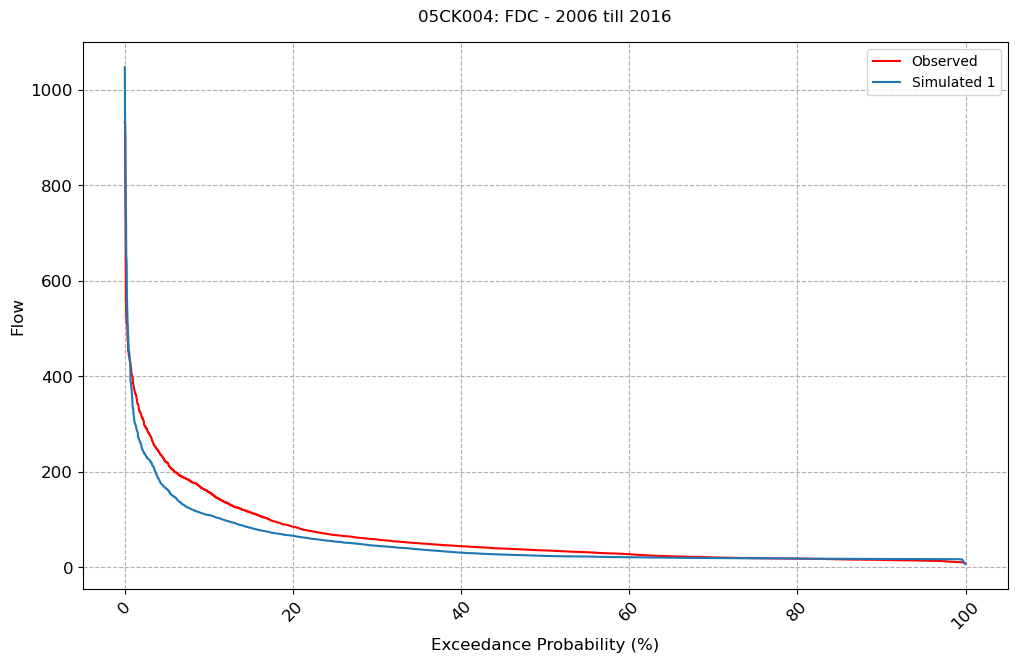

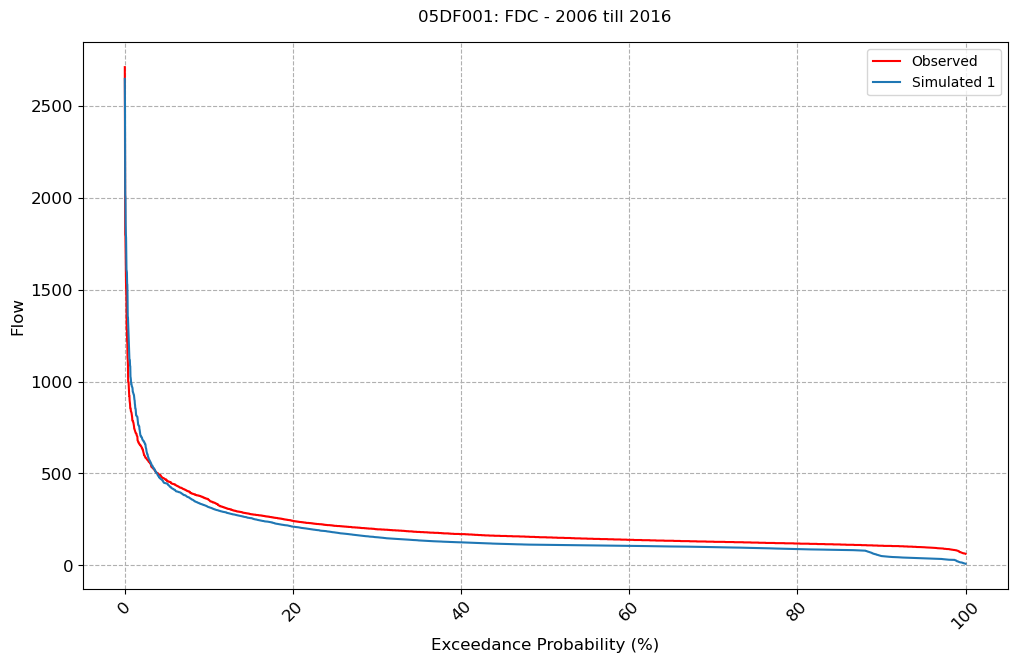

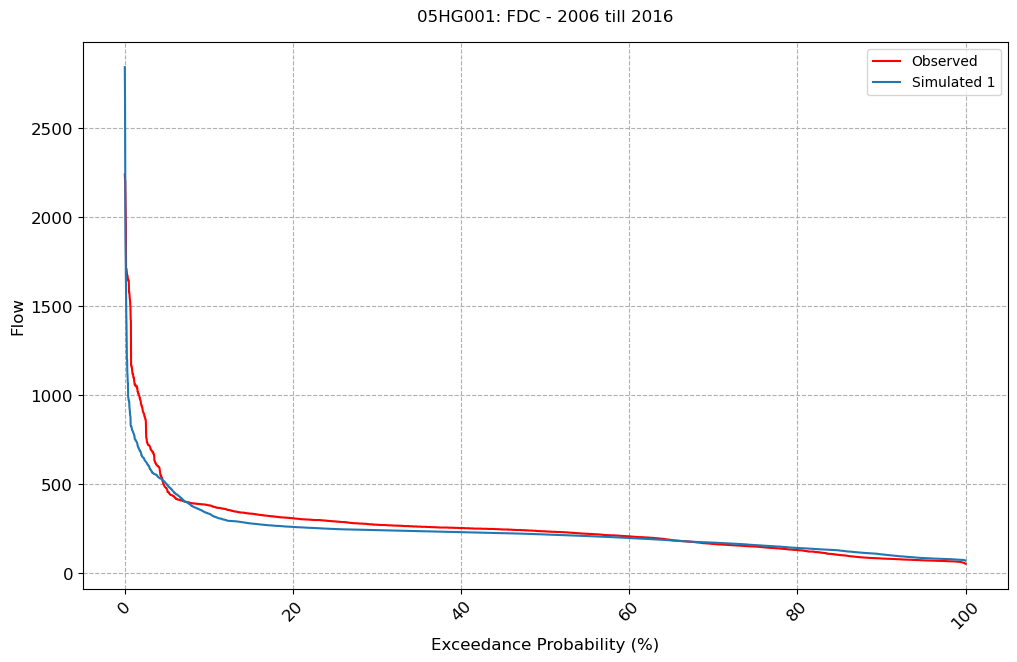

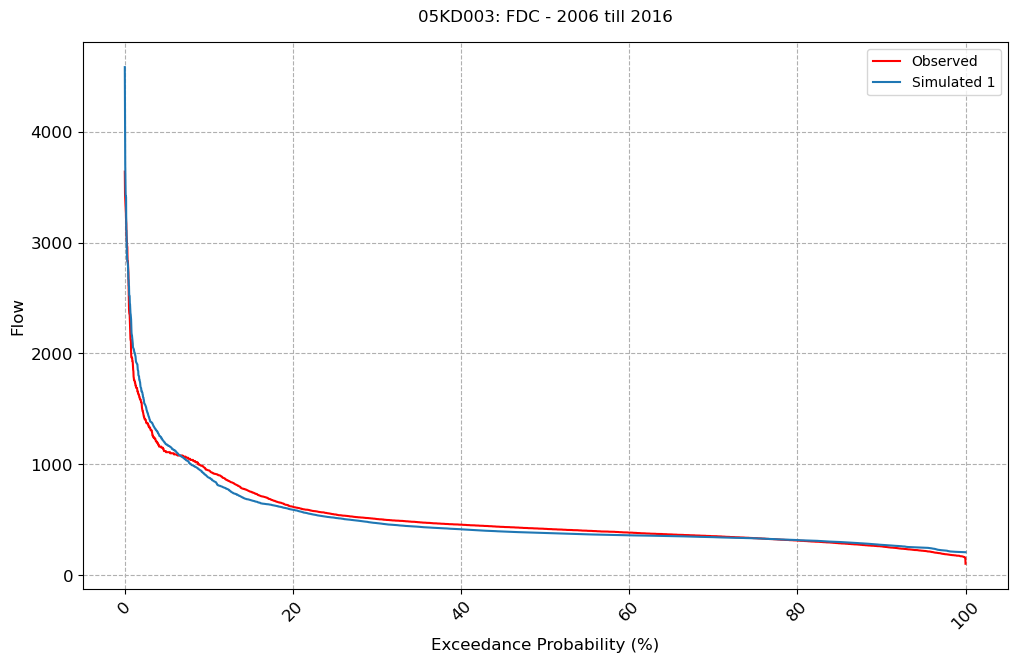

In [40]:
visuals.flow_duration_curve(
    merged_df =merged_df.loc[:, [col for col in stations_b if col in merged_df.columns]],
    title=[f"{i}: FDC - 2006 till 2016" for i in stations_b],
    grid = True
)